In [ ]:
#importing  all important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, BayesianRidge
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
#Downloding All Three Dataset

%%time
import requests

for filename in ['time_series_covid19_confirmed_global.csv',
                 'time_series_covid19_deaths_global.csv',
                 'time_series_covid19_recovered_global.csv',
                ]:
    print(f'Downloading {filename}')
    url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/{filename}'
    myfile = requests.get(url)
    open(filename, 'wb').write(myfile.content)

CPU times: user 134 ms, sys: 16.3 ms, total: 150 ms
Wall time: 1.23 s


In [ ]:
#Loading All Three Dataset

confirmed_cases=pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_reported=pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_cases=pd.read_csv('time_series_covid19_recovered_global.csv')

In [ ]:
#Displaying Head Of Dataset

confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772


In [ ]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2611,2618,2625,2631,2637,2642,2648,2654,2664,2673,2683,2686,2698,2710,2713,2721,2730,2733,2742,2745,2751,2762,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899,2919,2944,2973,3007,3034,3068,3104,3145
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2386,2389,2394,2396,2397,2399,2402,2403,2406,2408,2411,2412,2416,2420,2423,2426,2427,2429,2432,2435,2436,2438,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449,2450,2451,2451,2451,2451,2451,2451,2451
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3234,3244,3253,3261,3270,3280,3289,3299,3307,3315,3321,3328,3335,3343,3350,3355,3360,3366,3374,3381,3388,3395,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460,3465,3472,3480,3490,3497,3504,3510,3518
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,125,125,125,125,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,591,594,596,600,602,603,609,618,622,628,630,633,636,639,645,649,651,655,659,677,685,696,704,709,715,725,731,735,742,745,749,757,764,766,772,780,784,788,794,797


In [ ]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52974,53103,53206,53272,53391,53391,53694,53750,53961,54019,54040,54222,54382,54503,54534,54619,54634,54663,54686,55010,55118,55529,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281,57450,57629,57741,57963,58070,58144,58265,58622
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107887,108606,109338,110172,110920,111792,112626,113468,114362,115253,116126,117089,118041,119061,120072,121122,122105,123081,124312,125419,126405,127240,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215,129308,129431,129473,129521,129566,129598,129627,129664
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,84745,84940,85108,85249,85398,85534,85693,85869,86007,86149,86280,86420,86554,86703,86857,87003,87137,87251,87359,87476,87609,87746,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419,89625,89839,90057,90281,90517,90767,90995,91198
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12590,12650,12684,12684,12753,12793,12818,12884,12900,12936,12962,12995,13021,13070,13104,13104,13155,13155,13155,13211,13234,13234,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416,13416,13458,13479,13507,13527,13527,13527,13527
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23584,23606,23876,23913,23913,24190,24190,24492,24503,24698,24713,24717,24772,25145,25187,25629,25650,25703,25715,25995,26013,26458,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646,27766,28079,28190,28264,28646,28802,28866,28880


In [ ]:
#Extracting All The Columns Using the .key() Function

cols=confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/28/21', '5/29/21', '5/30/21', '5/31/21', '6/1/21', '6/2/21',
       '6/3/21', '6/4/21', '6/5/21', '6/6/21'],
      dtype='object', length=506)

In [ ]:
#Extrscting Only Dtaes Columns that have Information of Confirmed, Death and Recovered Cases

confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]

In [ ]:
deaths=deaths_reported.loc[:,cols[4]:cols[-1]]

In [ ]:
recoveries=recovered_cases.loc[:,cols[4]:cols[-1]]

In [ ]:
#Checking Head of The Outbreak Cases

confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772


In [ ]:
#Finding the Total Confirmed cases, Death Cases, Recovered Cases and Append them in 4 Empty List
#Also, Calcutated the Total Mortality Rate 

dates=confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]

for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [ ]:
#Displaying Each Created Varriable

confirmed_sum

173310648

In [ ]:
death_sum

3728885

In [ ]:
recovered_sum

111146013

In [ ]:
world_cases

[557,
 655,
 941,
 1433,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69052,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84122,
 86013,
 88394,
 90377,
 92971,
 95279,
 98090,
 102003,
 106098,
 110047,
 114219,
 119041,
 126702,
 132492,
 146876,
 157950,
 169219,
 184027,
 199970,
 219535,
 246584,
 277359,
 309350,
 344205,
 387040,
 428219,
 479220,
 542097,
 607138,
 674418,
 733655,
 798949,
 875794,
 958629,
 1041679,
 1125250,
 1183609,
 1256219,
 1329371,
 1399212,
 1482610,
 1569630,
 1655153,
 1729417,
 1849112,
 1919853,
 2003857,
 2080973,
 2176491,
 2264524,
 2341739,
 2418310,
 2494320,
 2570078,
 2651377,
 2735668,
 2819764,
 2902007,
 2973582,
 3043786,
 3119324,
 3196455,
 3279935,
 3368292,
 3447490,
 3523887,
 3601559,
 3682058,
 3772095,
 3860819,
 3951089,
 4036352,
 4111266,
 4187924,
 4272394,
 4357399

In [ ]:
#Convert All the dates and the Cases in the Form of numpy array

days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [ ]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1433],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30803],
       [    34396],
       [    37130],
       [    40160],
       [    42769],
       [    44811],
       [    45229],
       [    60382],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79546],
       [    80399],
       [    81376],
       [    82736],
       [    84122],
       [    86013],
       [    88394],
       [    90377],
       [    92971],
       [    95279],
       [    98090],
       [   102003],
       [   106098],
       [   110047],
       [   114219],
       [   119041],
       [   126702],


In [ ]:
total_deaths

array([[     17],
       [     18],
       [     26],
       [     42],
       [     56],
       [     82],
       [    131],
       [    133],
       [    171],
       [    213],
       [    259],
       [    362],
       [    426],
       [    492],
       [    564],
       [    634],
       [    719],
       [    806],
       [    906],
       [   1013],
       [   1113],
       [   1118],
       [   1371],
       [   1523],
       [   1666],
       [   1770],
       [   1868],
       [   2008],
       [   2123],
       [   2248],
       [   2252],
       [   2459],
       [   2470],
       [   2630],
       [   2710],
       [   2771],
       [   2814],
       [   2873],
       [   2942],
       [   2996],
       [   3085],
       [   3160],
       [   3255],
       [   3349],
       [   3460],
       [   3564],
       [   3803],
       [   3993],
       [   4267],
       [   4611],
       [   4917],
       [   5414],
       [   5834],
       [   6475],
       [   7153],
       [  

In [ ]:
total_recovered

array([[       30],
       [       32],
       [       39],
       [       42],
       [       56],
       [       65],
       [      108],
       [      127],
       [      145],
       [      225],
       [      287],
       [      476],
       [      627],
       [      857],
       [     1129],
       [     1492],
       [     2016],
       [     2616],
       [     3245],
       [     3947],
       [     4684],
       [     5151],
       [     6294],
       [     8057],
       [     9396],
       [    10866],
       [    12583],
       [    14352],
       [    16121],
       [    18179],
       [    18892],
       [    22889],
       [    23394],
       [    25227],
       [    27905],
       [    30386],
       [    33278],
       [    36710],
       [    39781],
       [    42717],
       [    45601],
       [    48227],
       [    51169],
       [    53795],
       [    55863],
       [    58357],
       [    60694],
       [    62493],
       [    64400],
       [    66998],


In [ ]:
#Future forecasting for the next 10 Days

days_in_future=10
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]

In [ ]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
#Convert all the integers into datetime for better Visualization

start='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forcast_dates=[]
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
#For Visualization with the  latest data of today's Date

latest_confirmed=confirmed_cases[dates[-1]]
latest_deaths=deaths_reported[dates[-1]]
latest_recoveries=recovered_cases[dates[-1]]

In [ ]:
latest_confirmed

0       79224
1      132379
2      130958
3       13758
4       35772
        ...  
271      8791
272    310026
273      6787
274    100278
275     39189
Name: 6/6/21, Length: 276, dtype: int64

In [ ]:
latest_deaths

0      3145
1      2451
2      3518
3       127
4       797
       ... 
271      53
272    3517
273    1329
274    1308
275    1606
Name: 6/6/21, Length: 276, dtype: int64

In [ ]:
latest_recoveries

0       58622
1      129664
2       91198
3       13527
4       28880
        ...  
256      3368
257    301881
258      3571
259     93374
260     36728
Name: 6/6/21, Length: 261, dtype: int64

In [ ]:
#Find the list of unique countries

unique_countries=list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [ ]:
#Calculating the Total Number of Confirmed cases by each country

country_confirmed_cases=[]
no_cases=[]
for i in unique_countries:
    cases=latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries=[k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [ ]:
#number of casesm per country/region

print('Confirmed Cases by Country/Region:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Country/Region:
US: 33362600 cases
India: 28909975 cases
Brazil: 16947062 cases
France: 5774361 cases
Turkey: 5287980 cases
Russia: 5067246 cases
United Kingdom: 4532802 cases
Italy: 4232428 cases
Argentina: 3955439 cases
Germany: 3708898 cases
Spain: 3697981 cases
Colombia: 3571067 cases
Iran: 2966363 cases
Poland: 2875136 cases
Mexico: 2433681 cases
Ukraine: 2273708 cases
Peru: 1980391 cases
Indonesia: 1856038 cases
South Africa: 1696564 cases
Netherlands: 1690481 cases
Czechia: 1663517 cases
Chile: 1427956 cases
Canada: 1400093 cases
Philippines: 1269478 cases
Iraq: 1224992 cases
Romania: 1078863 cases
Sweden: 1078062 cases
Belgium: 1070802 cases
Pakistan: 933630 cases
Portugal: 852646 cases
Israel: 839571 cases
Bangladesh: 810990 cases
Hungary: 806008 cases
Japan: 762980 cases
Jordan: 739847 cases
Serbia: 713678 cases
Switzerland: 697292 cases
Austria: 646800 cases
Malaysia: 616815 cases
Nepal: 588124 cases
United Arab Emirates: 583071 cases
Lebanon: 541557 cases

In [ ]:
#Find the list of unique provinces

unique_provinces= list(confirmed_cases['Province/State'].unique())

In [ ]:
# finding  the number of confirmed cases per province, State or city

provinces_confirmed_cases=[]
no_cases=[]
for i in unique_provinces:
    cases=latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases>0:
        provinces_confirmed_cases.append(cases)
        
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)

In [ ]:
#number of cases per provinces/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {provinces_confirmed_cases[i]} cases')

Australian Capital Territory: 124 cases
New South Wales: 5600 cases
Northern Territory: 173 cases
Queensland: 1632 cases
South Australia: 764 cases
Tasmania: 234 cases
Victoria: 20646 cases
Western Australia: 1018 cases
Alberta: 229192 cases
British Columbia: 145049 cases
Grand Princess: 13 cases
Manitoba: 52751 cases
New Brunswick: 2265 cases
Newfoundland and Labrador: 1352 cases
Northwest Territories: 128 cases
Nova Scotia: 5663 cases
Nunavut: 649 cases
Ontario: 543601 cases
Prince Edward Island: 204 cases
Quebec: 371767 cases
Repatriated Travellers: 13 cases
Saskatchewan: 47359 cases
Yukon: 87 cases
Anhui: 1004 cases
Beijing: 1064 cases
Chongqing: 598 cases
Fujian: 629 cases
Gansu: 194 cases
Guangdong: 2542 cases
Guangxi: 275 cases
Guizhou: 147 cases
Hainan: 188 cases
Hebei: 1317 cases
Heilongjiang: 1612 cases
Henan: 1316 cases
Hong Kong: 11858 cases
Hubei: 68159 cases
Hunan: 1051 cases
Inner Mongolia: 388 cases
Jiangsu: 728 cases
Jiangxi: 937 cases
Jilin: 573 cases
Liaoning: 426 ca

In [ ]:
# Handaling NAN value

nan_indices=[]

for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)
        
unique_provinces=list(unique_provinces)
provinces_confirmed_cases=list(provinces_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    provinces_confirmed_cases.pop(i)

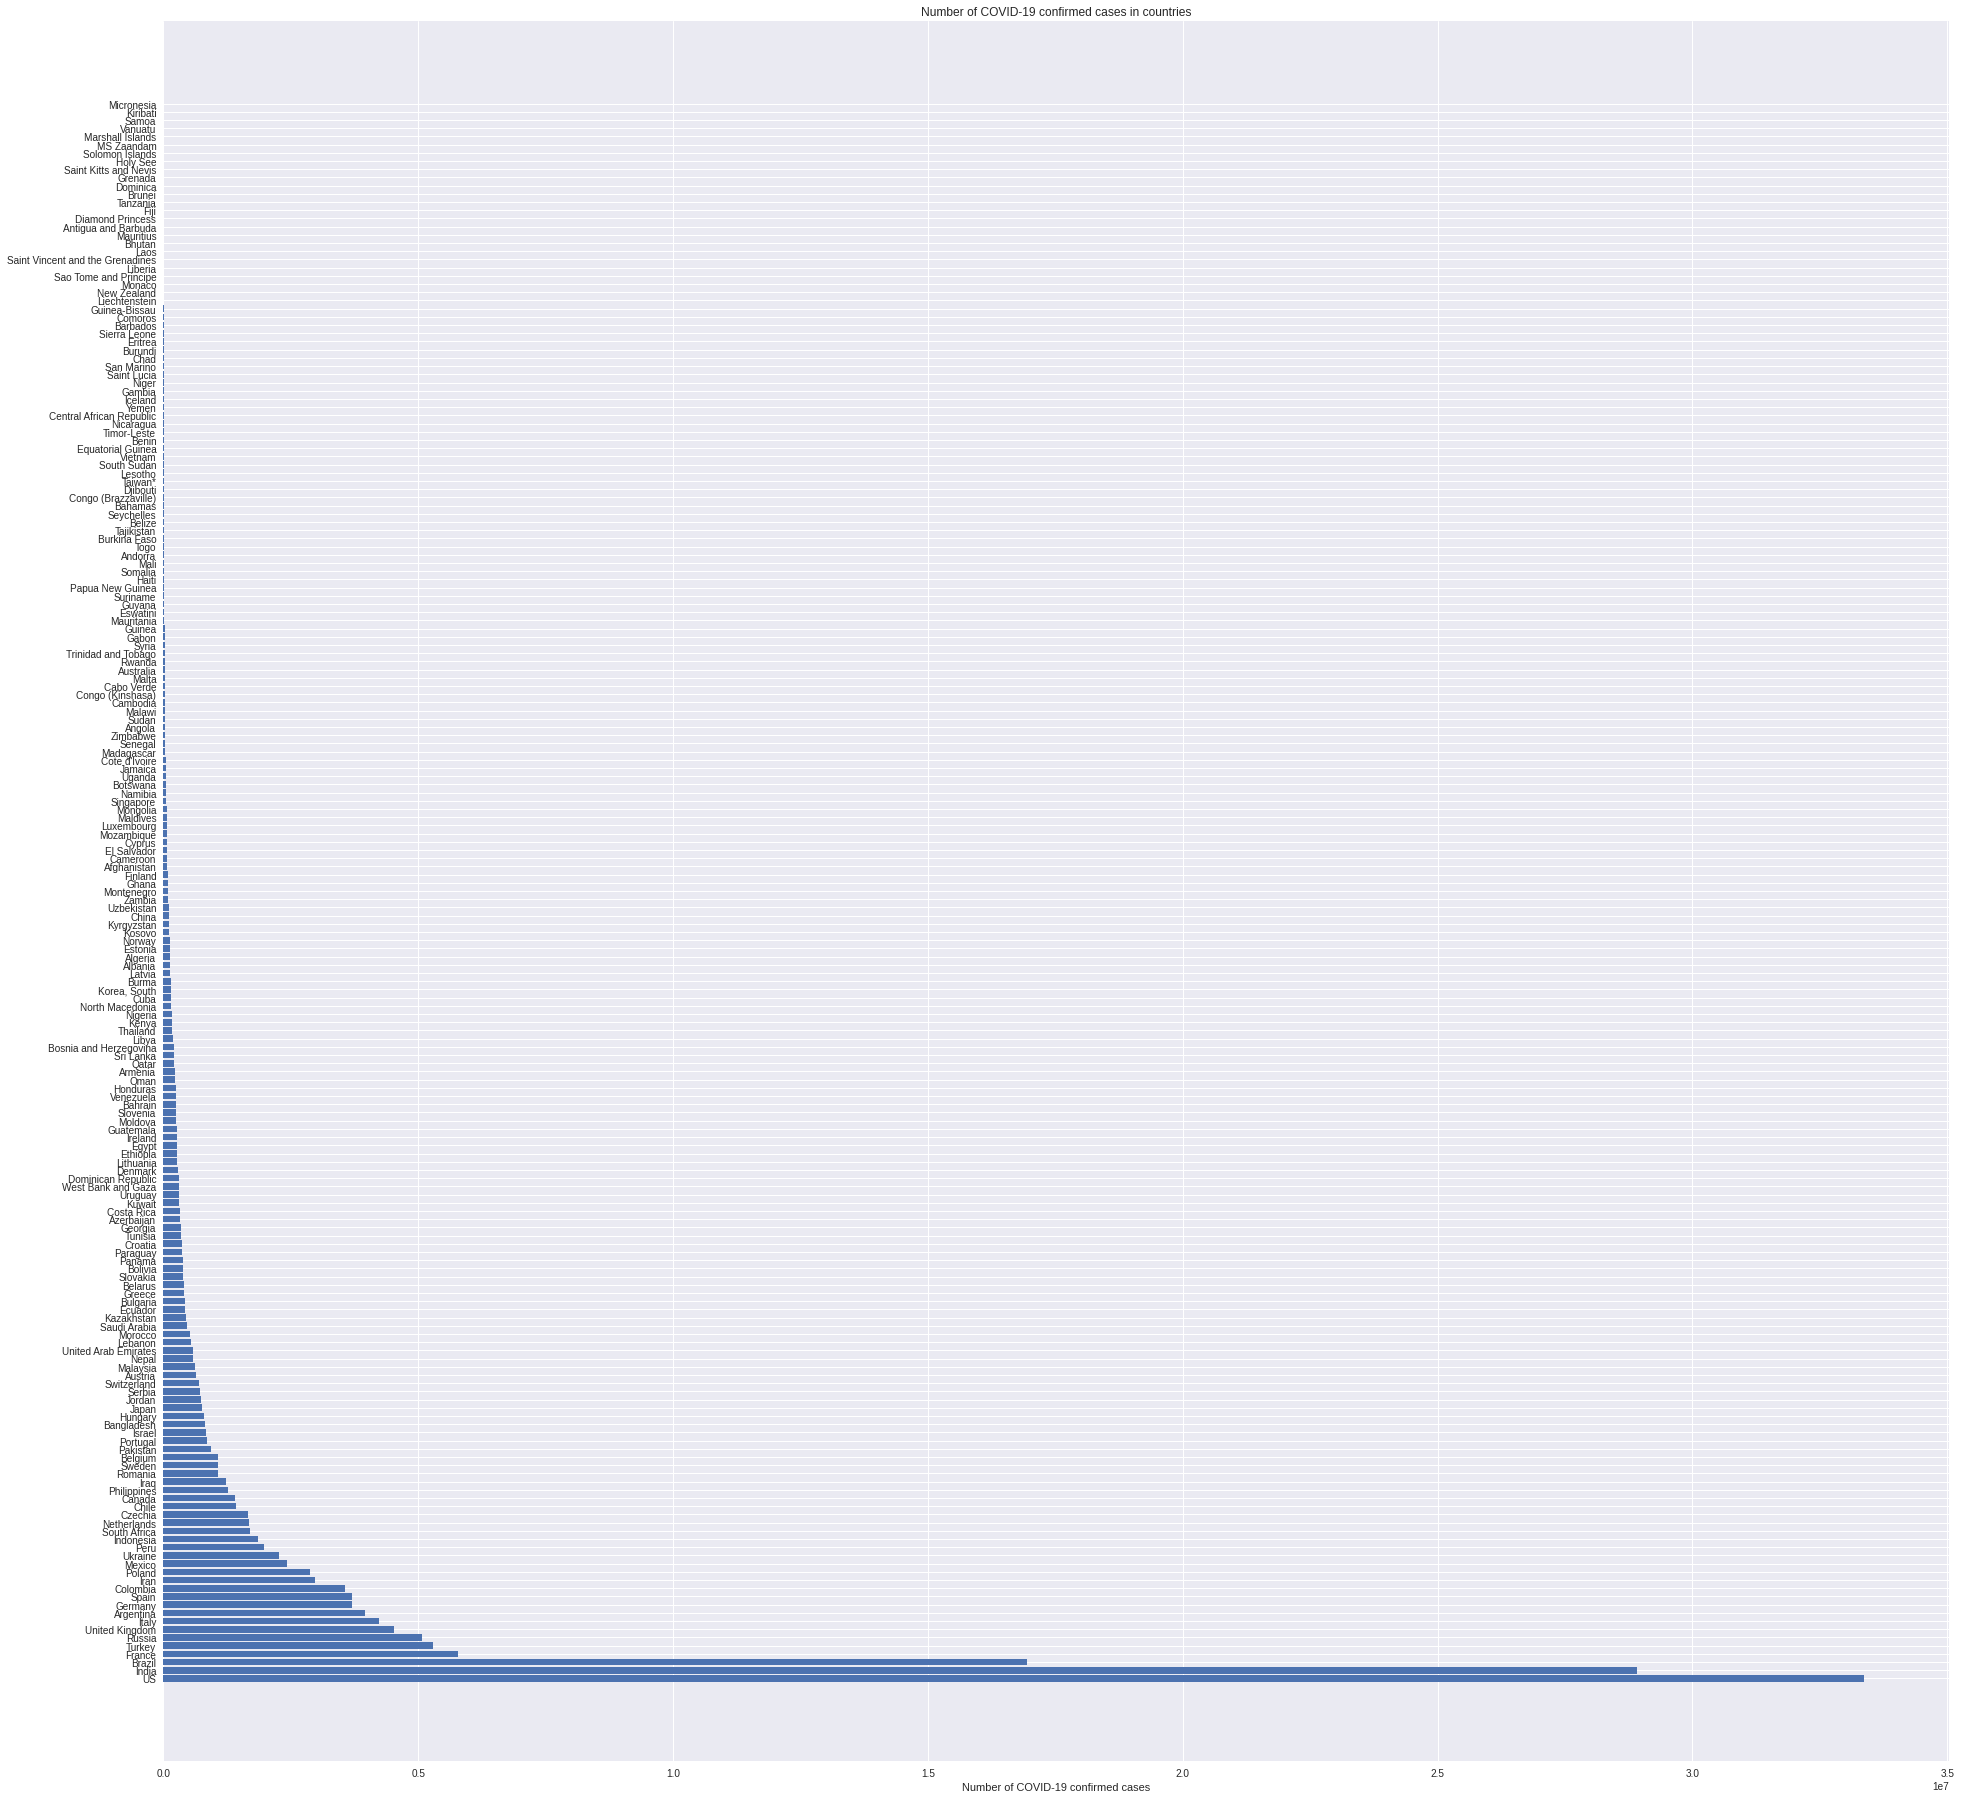

In [ ]:
# plotting  a bar graph to see the total con firmed cases across the countries

plt.figure (figsize=(32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of COVID-19 confirmed cases in countries')
plt.xlabel('Number of COVID-19 confirmed cases')
plt.show()

In [ ]:
#only show 10 countries with the most confirmed cases, the rest are grouped into the catogry called others

visual_unique_countries=[]
visual_confirmed_cases=[]
others=np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

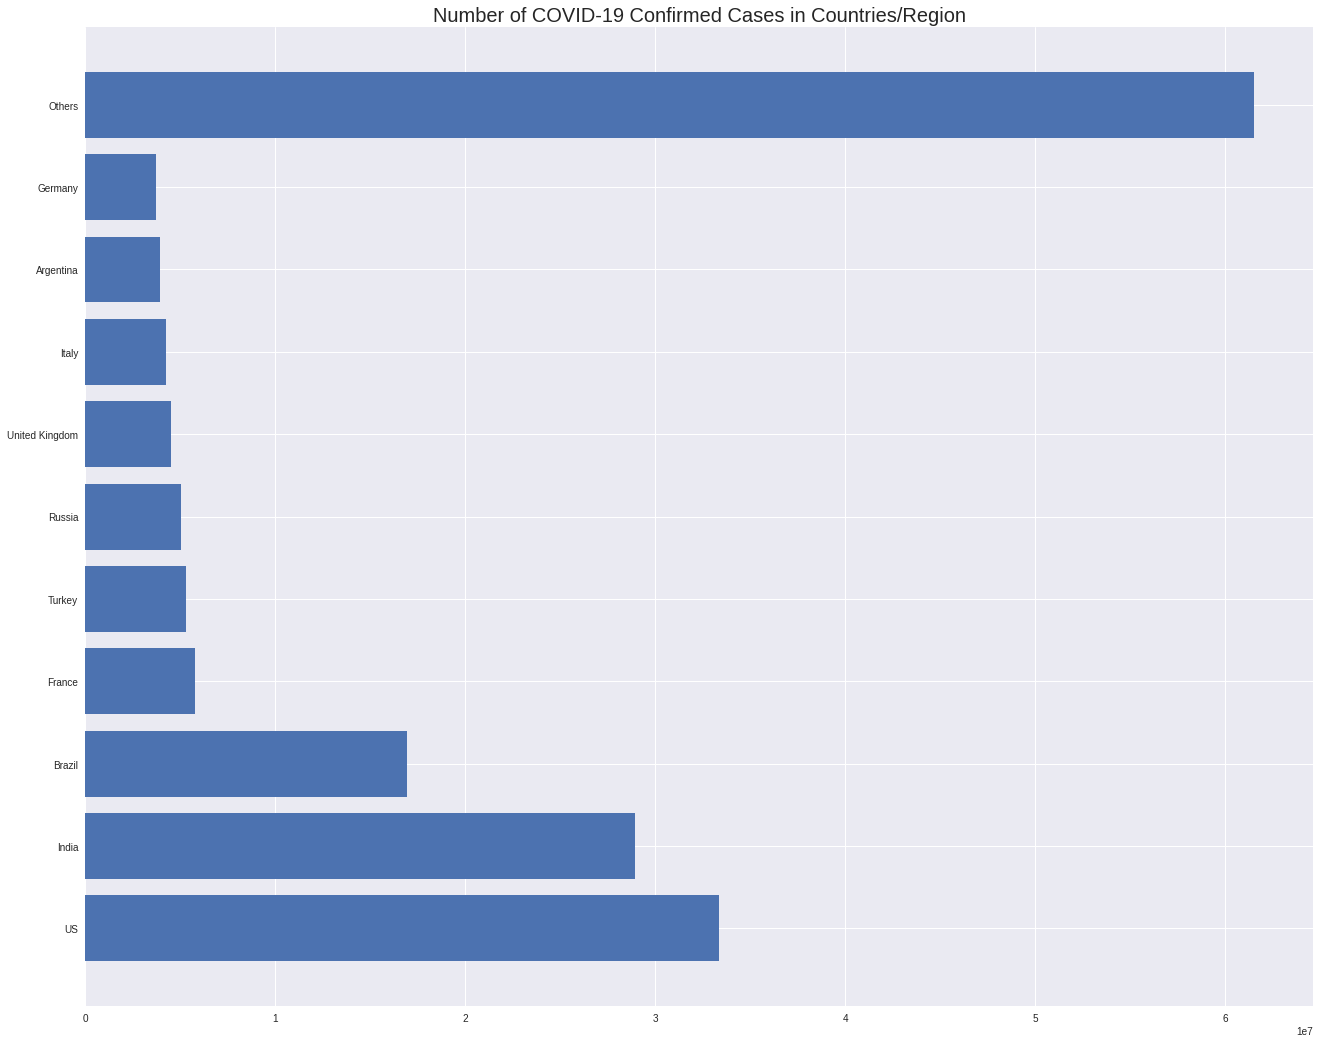

In [ ]:
#visulization of 10 contries

plt.figure(figsize=(22,18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of COVID-19 Confirmed Cases in Countries/Region', size=20)
plt.show()

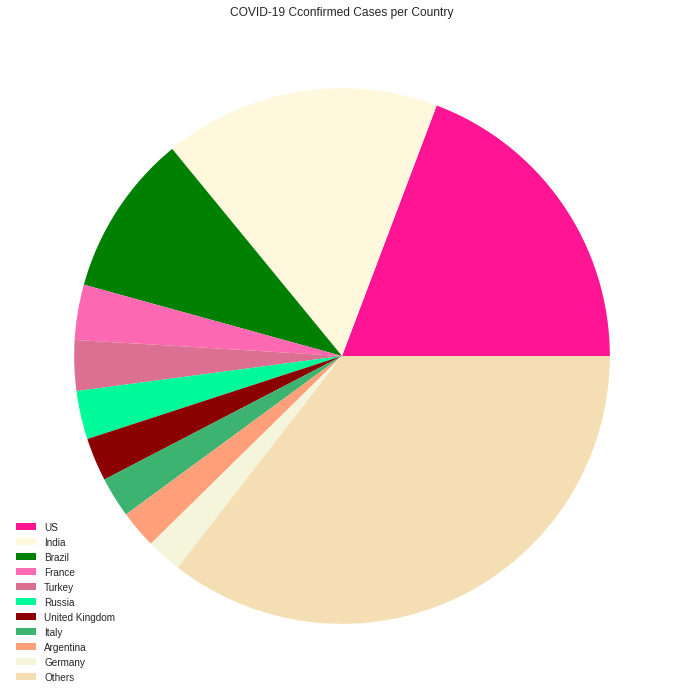

In [ ]:
# craete a pie chart to see the total confirmed cases in 10 fifferent countries

c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(12,20))
plt.title('COVID-19 Cconfirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.36, shuffle=False)

In [ ]:
# # Building  the SVM Model 

# kernel=['poly','sigmoid','rbf']
# c=[0.01,0.1,1,10]
# gamma=[0.01,0.1,1]
# epsilon=[0.01,0.1,1]
# shrinking=[True,False]
# svm_grid={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}
 
# svm=SVR()
# svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=4, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [ ]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=4, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# svm_search.best_params_

In [ ]:
# svm_confirmed=svm_search.best_estimator_
svm_pred=svm_confirmed.predict(future_forecast)

In [ ]:
svm_confirmed

SVR(C=0.1, cache_size=200, coef0=0.0, degree=4, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_pred

array([3.67617019e+06, 3.67617019e+06, 3.67617029e+06, 3.67617072e+06,
       3.67617189e+06, 3.67617434e+06, 3.67617880e+06, 3.67618615e+06,
       3.67619742e+06, 3.67621381e+06, 3.67623667e+06, 3.67626752e+06,
       3.67630805e+06, 3.67636007e+06, 3.67642559e+06, 3.67650676e+06,
       3.67660590e+06, 3.67672547e+06, 3.67686811e+06, 3.67703661e+06,
       3.67723393e+06, 3.67746318e+06, 3.67772762e+06, 3.67803068e+06,
       3.67837597e+06, 3.67876722e+06, 3.67920835e+06, 3.67970343e+06,
       3.68025667e+06, 3.68087248e+06, 3.68155540e+06, 3.68231014e+06,
       3.68314155e+06, 3.68405468e+06, 3.68505470e+06, 3.68614696e+06,
       3.68733697e+06, 3.68863039e+06, 3.69003304e+06, 3.69155090e+06,
       3.69319013e+06, 3.69495702e+06, 3.69685803e+06, 3.69889979e+06,
       3.70108908e+06, 3.70343284e+06, 3.70593817e+06, 3.70861233e+06,
       3.71146274e+06, 3.71449698e+06, 3.71772278e+06, 3.72114805e+06,
       3.72478084e+06, 3.72862938e+06, 3.73270203e+06, 3.73700734e+06,
      

MAE 91309782.06854735
MSE 1.3442149993059688e+16


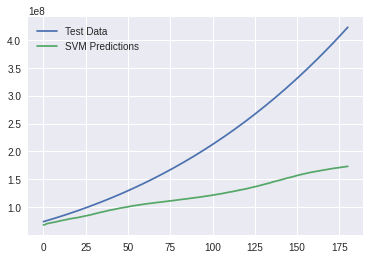

In [ ]:
#check agaist testing data

svm_test_pred=svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE',mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE',mean_squared_error(svm_test_pred, y_test_confirmed))

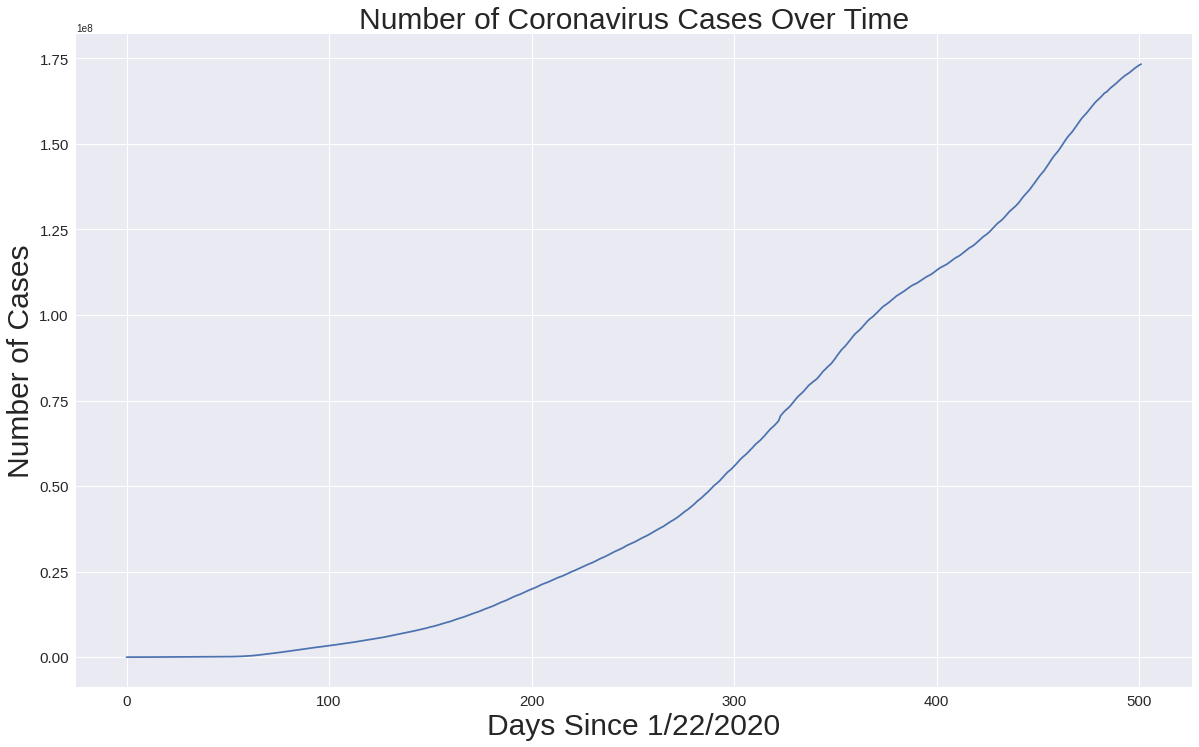

In [ ]:
# Total number of coronavirus cases over time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)

plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

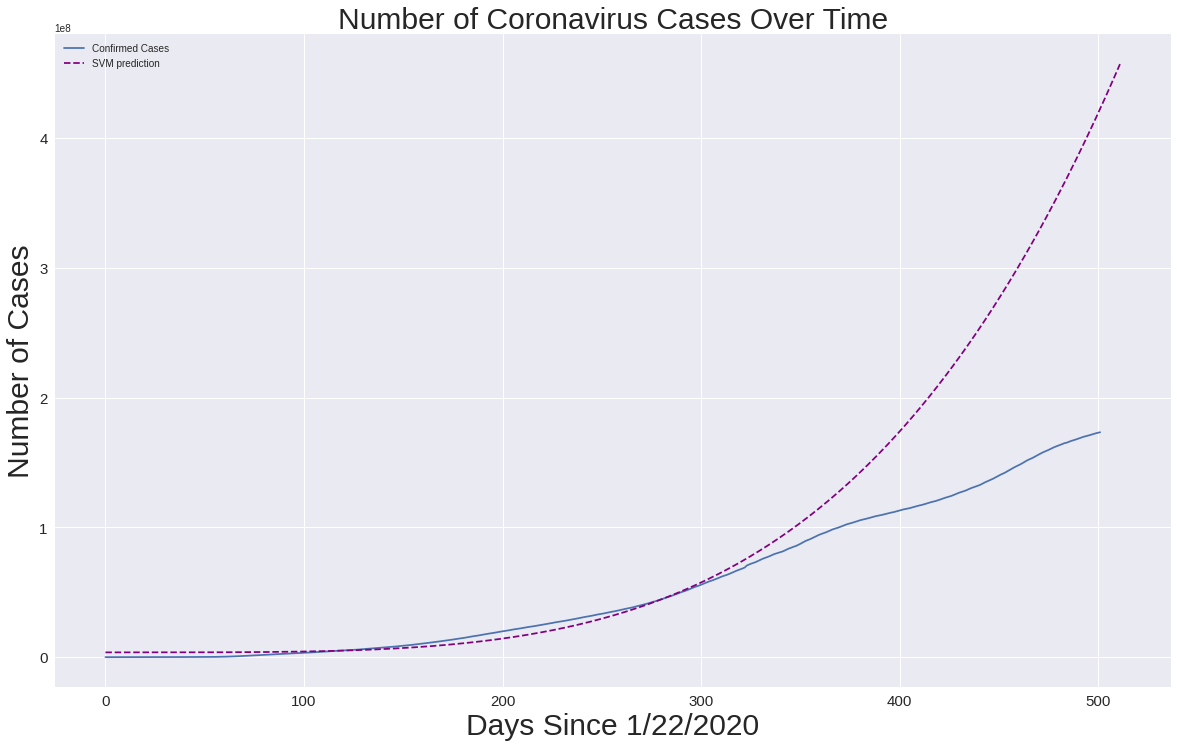

In [ ]:
# confirm vs predicted cases
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='purple')
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','SVM prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
# Prediction for the next 10 days usding SVM

print('SVM future prediction:')
set(zip(future_forcast_dates[-10:],svm_pred[-10:]))

SVM future prediction:


{('06/07/2021', 425890536.36041653),
 ('06/08/2021', 429264860.177189),
 ('06/09/2021', 432659369.3219644),
 ('06/10/2021', 436074144.1178628),
 ('06/11/2021', 439509265.06219876),
 ('06/12/2021', 442964812.8534585),
 ('06/13/2021', 446440868.25384915),
 ('06/14/2021', 449937512.2717935),
 ('06/15/2021', 453454826.0460855),
 ('06/16/2021', 456992890.8621255)}

In [ ]:
#changing data according to Polinomial Regression Model
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forecast)

In [ ]:
#Building Polynomial regression model and finding errors
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 18499120.007024884
MSE: 611048180762548.6


In [ ]:
#Linear model cofficient
print(linear_model.coef_)

[[-4.27818817e+05  8.72656974e+03  1.32514834e+02  1.53160255e+00]]


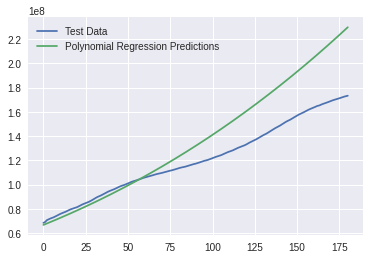

In [ ]:
#Testing model against prediction
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

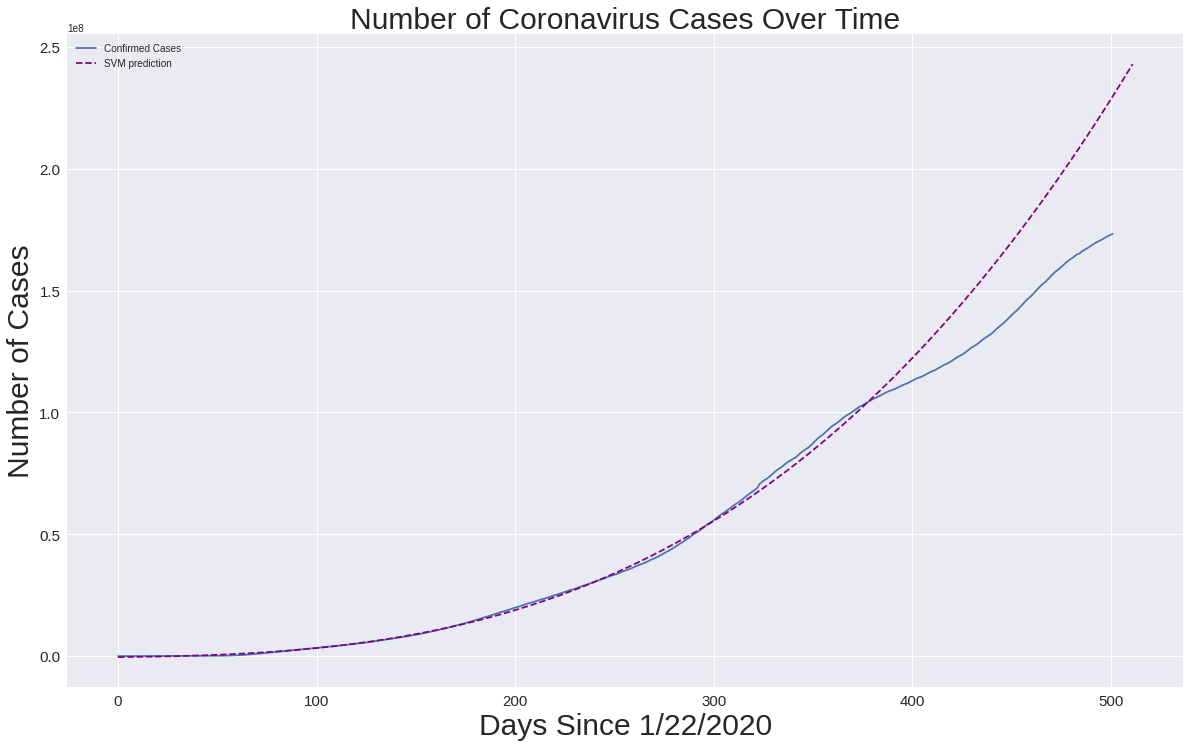

In [ ]:
# confirm vs predicted cases
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,linear_pred,linestyle='dashed',color='purple')
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','SVM prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_1_22, total_deaths, test_size=0.36, shuffle=False)

In [ ]:
svm_death = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4, C=0.1)
svm_death.fit(X_train_death, y_train_death)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=4, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_pred1=svm_death.predict(future_forecast)

In [ ]:
svm_death

SVR(C=0.1, cache_size=200, coef0=0.0, degree=4, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_pred1

array([  302770.64854229,   302770.64868572,   302770.65083716,
         302770.66016005,   302770.68526013,   302770.73818544,
         302770.83442632,   302770.9929154 ,   302771.23602761,
         302771.58958017,   302772.08283261,   302772.74848675,
         302773.6226867 ,   302774.74501888,   302776.15851198,
         302777.90963704,   302780.04830733,   302782.62787846,
         302785.70514834,   302789.34035715,   302793.59718741,
         302798.54276388,   302804.24765361,   302810.78586597,
         302818.23485282,   302826.67550787,   302836.19216759,
         302846.8726105 ,   302858.8080573 ,   302872.09317144,
         302886.82605823,   302903.10826525,   302921.04478293,
         302940.74404318,   302962.317921  ,   302985.88173321,
         303011.55423898,   303039.45764018,   303069.71757998,
         303102.46314543,   303137.82686415,   303175.94470706,
         303216.95608759,   303261.00386012,   303308.23432341,
         303358.79721732,   303412.84572

MAE 2195193.221639059
MSE 7351946252961.85


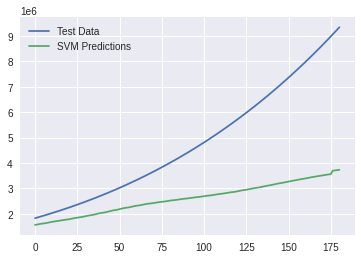

In [ ]:
svm_test_pred=svm_death.predict(X_test_death)
plt.plot(svm_test_pred)
plt.plot(y_test_death)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE',mean_absolute_error(svm_test_pred, y_test_death))
print('MSE',mean_squared_error(svm_test_pred, y_test_death))

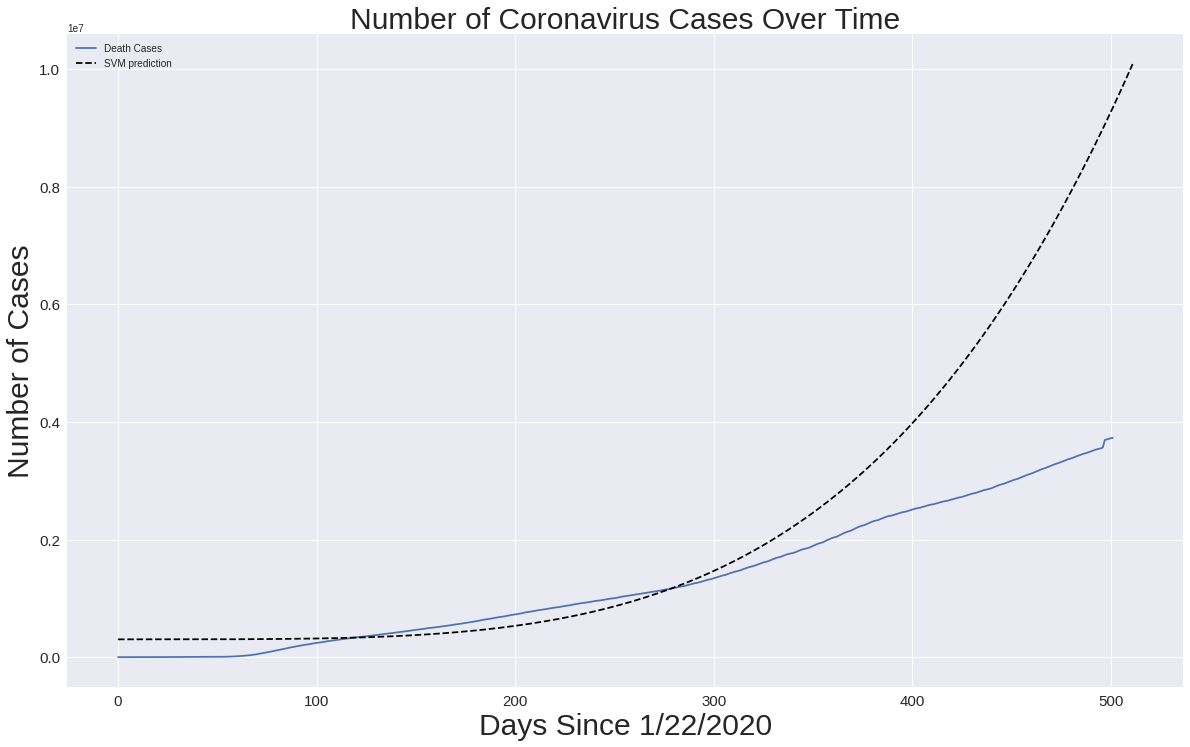

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths)
plt.plot(future_forecast,svm_pred1,linestyle='dashed',color='black')
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Death Cases','SVM prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
print('SVM future prediction for Death Cases:')
set(zip(future_forcast_dates[-10:],svm_pred1[-10:]))

SVM future prediction for Death Cases:


{('06/07/2021', 9411377.050153622),
 ('06/08/2021', 9484172.741926083),
 ('06/09/2021', 9557403.910138974),
 ('06/10/2021', 9631072.260724911),
 ('06/11/2021', 9705179.548810849),
 ('06/12/2021', 9779727.531476865),
 ('06/13/2021', 9854717.92014874),
 ('06/14/2021', 9930152.481061826),
 ('06/15/2021', 10006032.954572568),
 ('06/16/2021', 10082361.102643857)}

In [ ]:
poly = PolynomialFeatures(degree=3)
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)
poly_future_forcast = poly.fit_transform(future_forecast)

In [ ]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_death, y_train_death)
test_linear_pred = linear_model.predict(poly_X_test_death)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(test_linear_pred, y_test_death))

MAE: 567402.0304060886
MSE: 403950311079.6964


In [ ]:
print(linear_model.coef_)

[[-4.76783160e+04  1.13017202e+03  1.71745879e+01 -1.83157709e-02]]


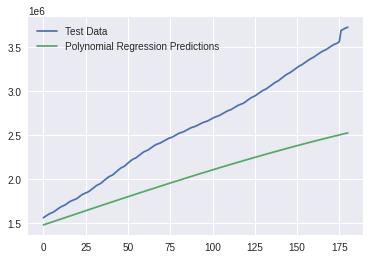

In [ ]:
plt.plot(y_test_death)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

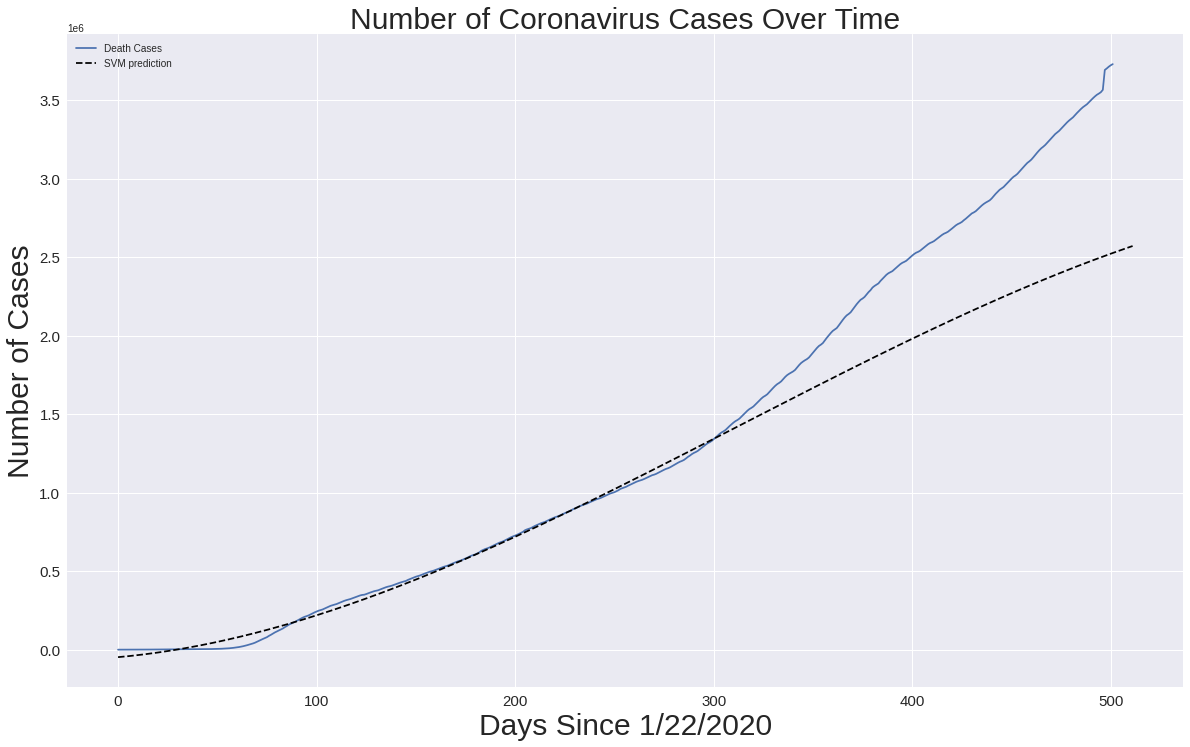

In [ ]:
# Death vs predicted cases
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_deaths)
plt.plot(future_forecast,linear_pred,linestyle='dashed',color='black')
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Death Cases','SVM prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
X_train_recover, X_test_recover, y_train_recover, y_test_recover = train_test_split(days_since_1_22, total_recovered, test_size=0.36, shuffle=False)

In [ ]:
svm_recover = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4, C=0.1)
svm_recover.fit(X_train_recover, y_train_recover)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=4, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_pred2=svm_recover.predict(future_forecast)

In [ ]:
svm_recover

SVR(C=0.1, cache_size=200, coef0=0.0, degree=4, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_pred2

array([9.43343403e+05, 9.43343408e+05, 9.43343479e+05, 9.43343787e+05,
       9.43344616e+05, 9.43346365e+05, 9.43349544e+05, 9.43354780e+05,
       9.43362811e+05, 9.43374490e+05, 9.43390784e+05, 9.43412774e+05,
       9.43441653e+05, 9.43478729e+05, 9.43525423e+05, 9.43583270e+05,
       9.43653920e+05, 9.43739135e+05, 9.43840791e+05, 9.43960879e+05,
       9.44101501e+05, 9.44264876e+05, 9.44453334e+05, 9.44669321e+05,
       9.44915395e+05, 9.45194228e+05, 9.45508607e+05, 9.45861430e+05,
       9.46255712e+05, 9.46694580e+05, 9.47181274e+05, 9.47719149e+05,
       9.48311673e+05, 9.48962429e+05, 9.49675112e+05, 9.50453532e+05,
       9.51301611e+05, 9.52223387e+05, 9.53223010e+05, 9.54304745e+05,
       9.55472969e+05, 9.56732174e+05, 9.58086966e+05, 9.59542064e+05,
       9.61102300e+05, 9.62772622e+05, 9.64558089e+05, 9.66463876e+05,
       9.68495270e+05, 9.70657673e+05, 9.72956600e+05, 9.75397680e+05,
       9.77986655e+05, 9.80729382e+05, 9.83631831e+05, 9.86700085e+05,
      

MAE 65088719.29217309
MSE 4536007810867129.0


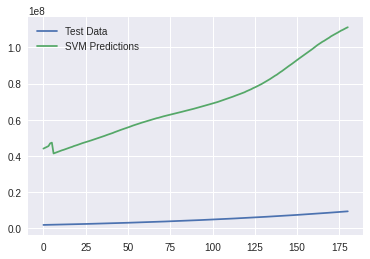

In [ ]:
svm_recover_pred2=svm_death.predict(X_test_recover)
plt.plot(svm_recover_pred2)
plt.plot(y_test_recover)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE',mean_absolute_error(svm_test_pred, y_test_recover))
print('MSE',mean_squared_error(svm_test_pred, y_test_recover))

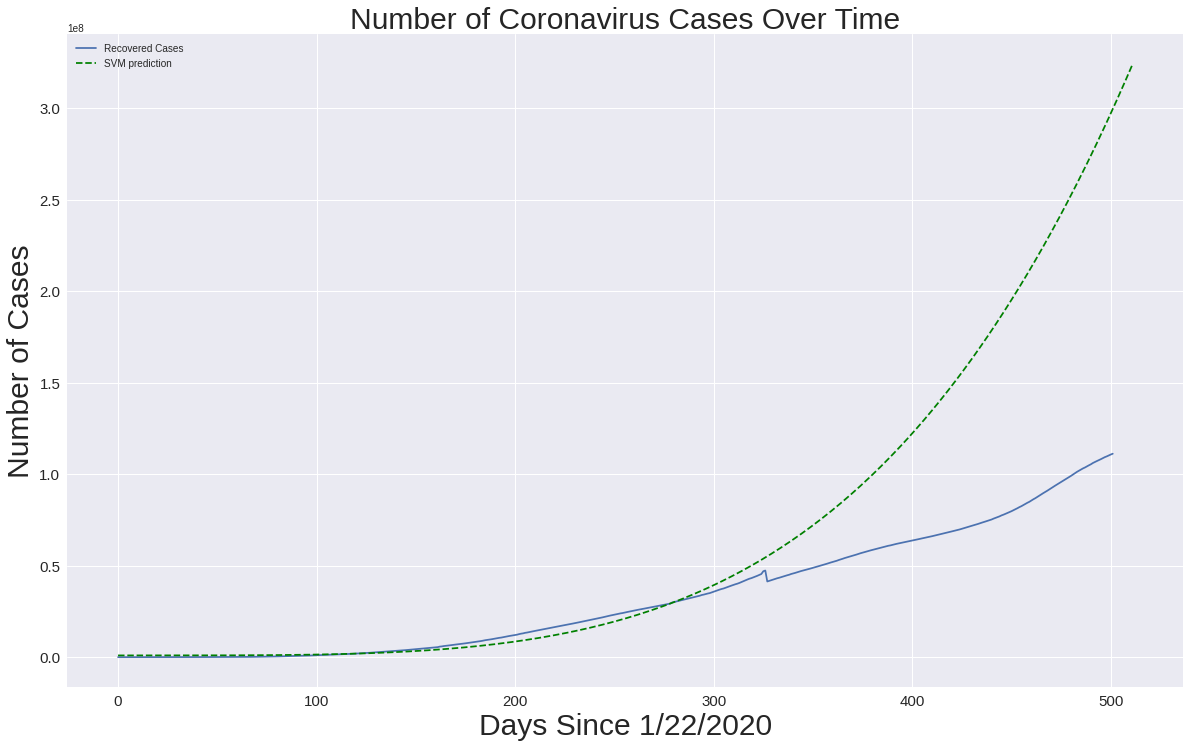

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_recovered)
plt.plot(future_forecast,svm_pred2,linestyle='dashed',color='green')
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Recovered Cases','SVM prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
print('SVM future prediction for Recover Cases:')
set(zip(future_forcast_dates[-10:],svm_pred2[-10:]))

SVM future prediction for Recover Cases:


{('06/07/2021', 301841926.7971454),
 ('06/08/2021', 304246698.7311054),
 ('06/09/2021', 306665856.0946308),
 ('06/10/2021', 309099456.13662297),
 ('06/11/2021', 311547556.22549015),
 ('06/12/2021', 314010213.86440617),
 ('06/13/2021', 316487486.6163593),
 ('06/14/2021', 318979432.2124286),
 ('06/15/2021', 321486108.4867206),
 ('06/16/2021', 324007573.34963566)}

In [ ]:
poly = PolynomialFeatures(degree=3)
poly_X_train_recover = poly.fit_transform(X_train_recover)
poly_X_test_recover = poly.fit_transform(X_test_recover)
poly_future_forcast = poly.fit_transform(future_forecast)

In [ ]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_recover, y_train_recover)
test_linear_pred = linear_model.predict(poly_X_test_recover)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_recover))
print('MSE:',mean_squared_error(test_linear_pred, y_test_recover))

MAE: 13233498.866422826
MSE: 220474679418903.06


In [ ]:
print(linear_model.coef_)

[[ 9.24261977e+05 -5.08361844e+04  4.74205399e+02  2.96694744e-01]]


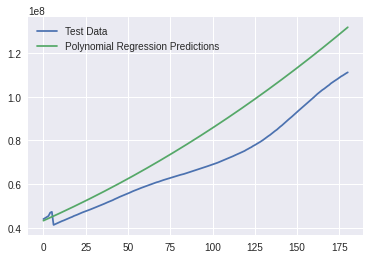

In [ ]:
plt.plot(y_test_recover)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

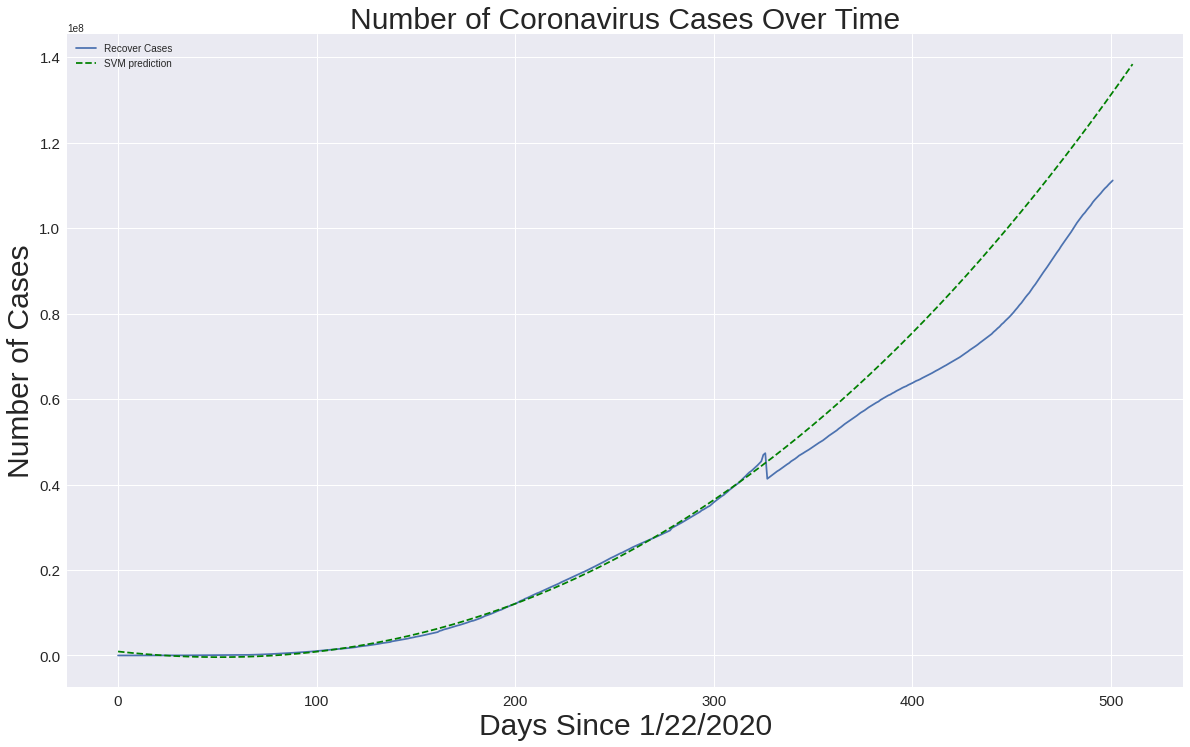

In [ ]:
# Recover vs predicted cases
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_recovered)
plt.plot(future_forecast,linear_pred,linestyle='dashed',color='green')
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Recover Cases','SVM prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

<function matplotlib.pyplot.show>

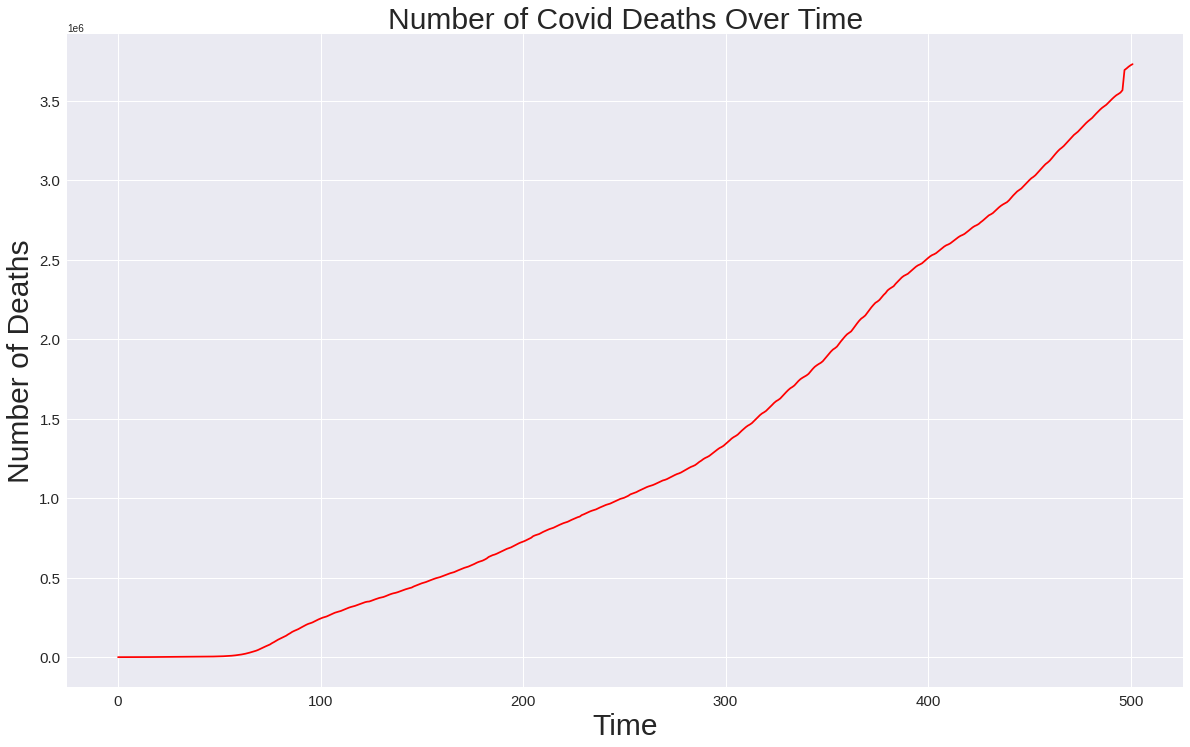

In [ ]:
#Total Deaths over time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_deaths,color='red')
plt.title('Number of Covid Deaths Over Time',size=30)
plt.xlabel('Time',size=30)
plt.ylabel('Number of Deaths',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show

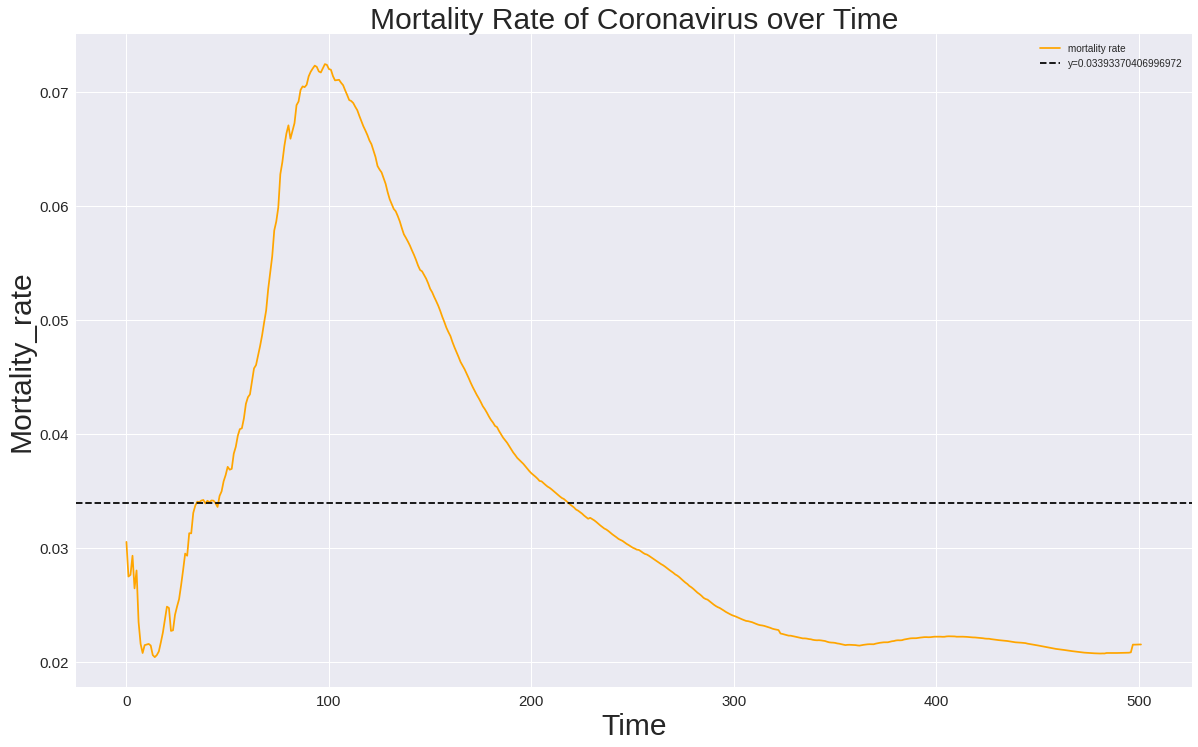

In [ ]:
#Motatlity Rate Over Time

mean_mortatlity_rate=np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,mortality_rate,color='orange')
plt.axhline(y=mean_mortatlity_rate,linestyle='--',color='black')
plt.title('Mortality Rate of Coronavirus over Time', size=30 )
plt.legend(['mortality rate','y='+str(mean_mortatlity_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality_rate',Size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

<function matplotlib.pyplot.show>

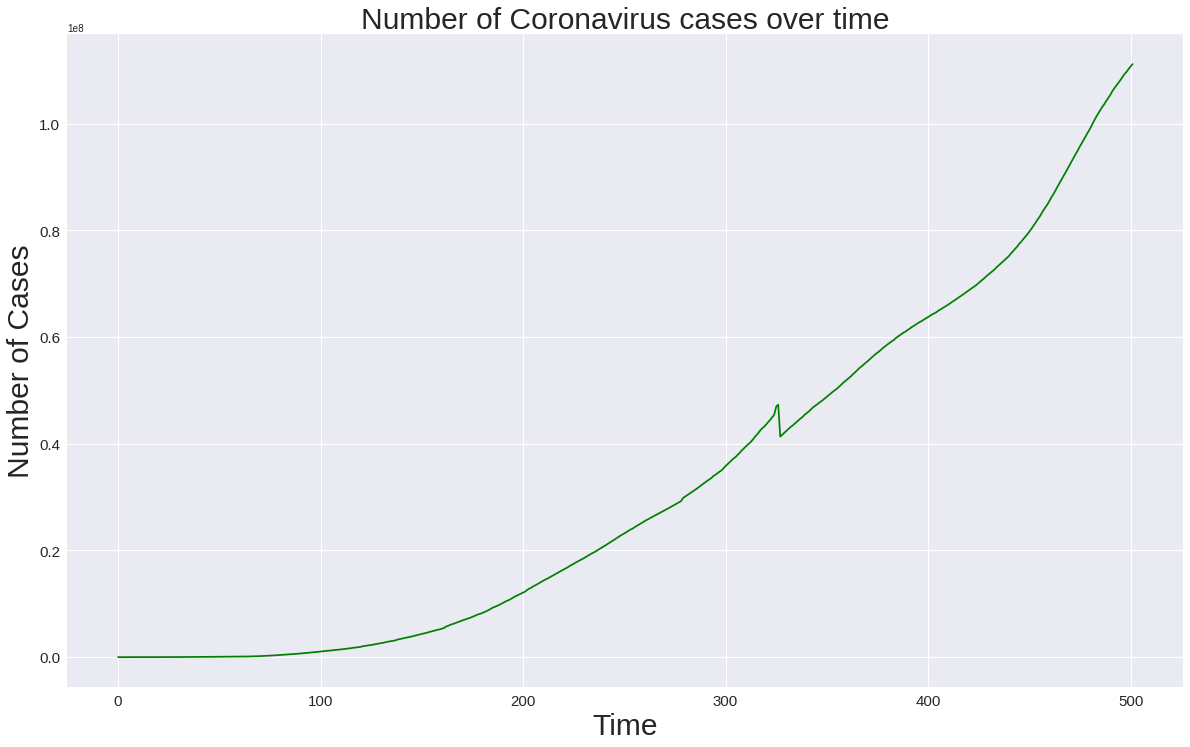

In [ ]:
#Coronavirus cases over Time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_recovered,color='green')
plt.title('Number of Coronavirus cases over time',size=30)
plt.xlabel('Time',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show

<function matplotlib.pyplot.show>

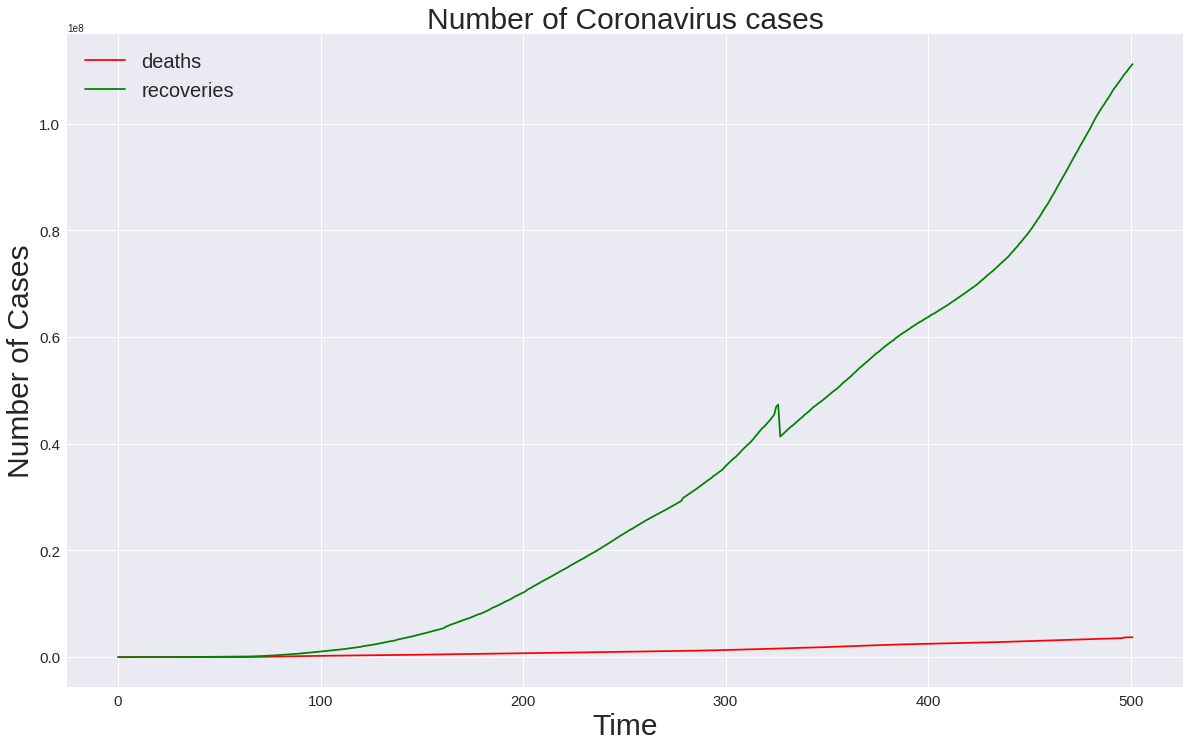

In [ ]:
# Number of Cronavirus cases recored vs the Number of Deaths 
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['deaths','recoveries'],loc='best', fontsize=20)
plt.title('Number of Coronavirus cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show

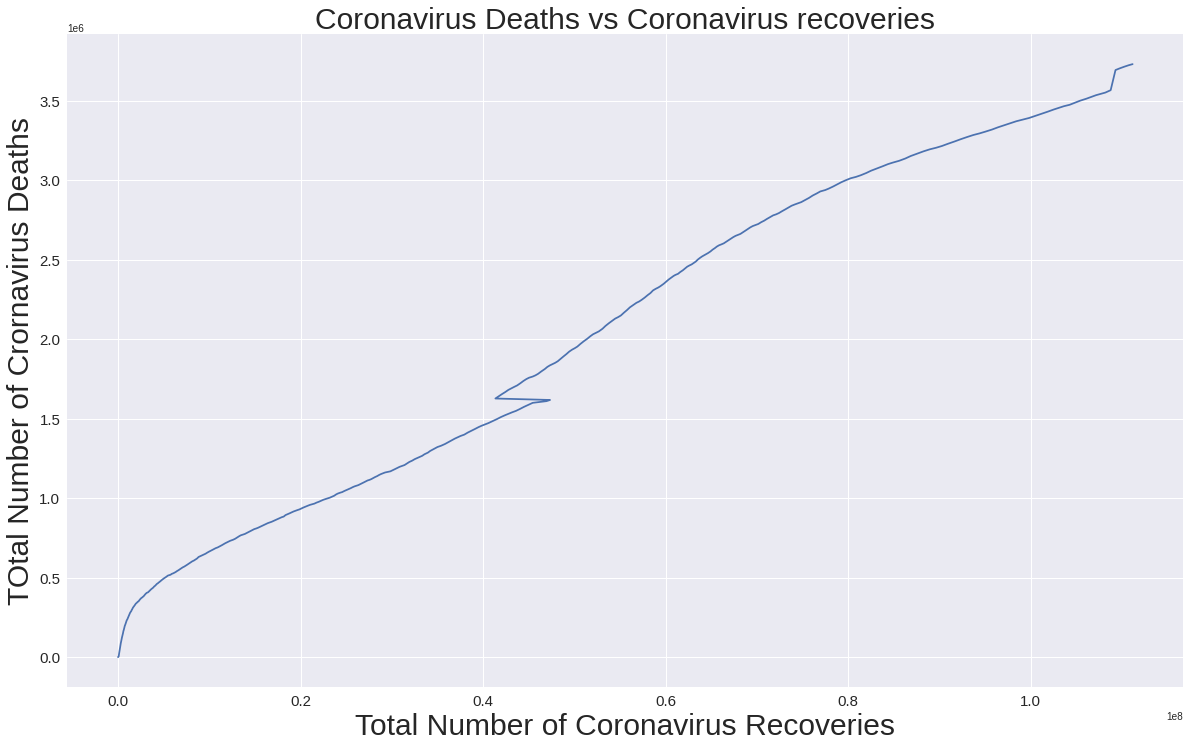

In [ ]:
#Coronavirus Death vs Recories

plt.figure(figsize=(20,12))
plt.plot(total_recovered, total_deaths)
plt.title('Coronavirus Deaths vs Coronavirus recoveries',size=30)
plt.xlabel('Total Number of Coronavirus Recoveries', size=30)
plt.ylabel('TOtal Number of Crornavirus Deaths',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [ ]:
confirmed_melt=confirmed_cases.melt(id_vars=['Country/Region','Province/State','Lat','Long'],value_vars=confirmed_cases.columns[4:],var_name='Date',value_name='confirmed_cases')
deaths_melt=deaths_reported.melt(id_vars=['Country/Region','Province/State','Lat','Long'],value_vars=confirmed_cases.columns[4:],var_name='Date',value_name='deaths_reported')
recovered_melt=recovered_cases.melt(id_vars=['Country/Region','Province/State','Lat','Long'],value_vars=confirmed_cases.columns[4:],var_name='Date',value_name='recovered_cases')

In [ ]:
confirmed_melt

,Country/Region,Province/State,Lat,Long,Date,confirmed_cases
0,Afghanistan,NaN,33.939110,67.709953,1/22/20,0
1,Albania,NaN,41.153300,20.168300,1/22/20,0
2,Algeria,NaN,28.033900,1.659600,1/22/20,0
3,Andorra,NaN,42.506300,1.521800,1/22/20,0
4,Angola,NaN,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
138547,Vietnam,NaN,14.058324,108.277199,6/6/21,8791
138548,West Bank and Gaza,NaN,31.952200,35.233200,6/6/21,310026
138549,Yemen,NaN,15.552727,48.516388,6/6/21,6787
138550,Zambia,NaN,-13.133897,27.849332,6/6/21,100278


In [ ]:
deaths_melt

,Country/Region,Province/State,Lat,Long,Date,deaths_reported
0,Afghanistan,NaN,33.939110,67.709953,1/22/20,0
1,Albania,NaN,41.153300,20.168300,1/22/20,0
2,Algeria,NaN,28.033900,1.659600,1/22/20,0
3,Andorra,NaN,42.506300,1.521800,1/22/20,0
4,Angola,NaN,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
138547,Vietnam,NaN,14.058324,108.277199,6/6/21,53
138548,West Bank and Gaza,NaN,31.952200,35.233200,6/6/21,3517
138549,Yemen,NaN,15.552727,48.516388,6/6/21,1329
138550,Zambia,NaN,-13.133897,27.849332,6/6/21,1308


In [ ]:
recovered_melt

,Country/Region,Province/State,Lat,Long,Date,recovered_cases
0,Afghanistan,NaN,33.939110,67.709953,1/22/20,0
1,Albania,NaN,41.153300,20.168300,1/22/20,0
2,Algeria,NaN,28.033900,1.659600,1/22/20,0
3,Andorra,NaN,42.506300,1.521800,1/22/20,0
4,Angola,NaN,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
131017,Vietnam,NaN,14.058324,108.277199,6/6/21,3368
131018,West Bank and Gaza,NaN,31.952200,35.233200,6/6/21,301881
131019,Yemen,NaN,15.552727,48.516388,6/6/21,3571
131020,Zambia,NaN,-13.133897,27.849332,6/6/21,93374


In [ ]:
confirmed_pr=confirmed_melt.groupby('Date').sum()['confirmed_cases'].reset_index()
deaths_pr=deaths_melt.groupby('Date').sum()['deaths_reported'].reset_index()
recovered_pr=recovered_melt.groupby('Date').sum()['recovered_cases'].reset_index()

In [ ]:
confirmed_pr

,Date,confirmed_cases
0,1/1/21,84093788
1,1/10/21,90365376
2,1/11/21,90984976
3,1/12/21,91690531
4,1/13/21,92438858
...,...,...
497,9/5/20,26923081
498,9/6/20,27153595
499,9/7/20,27371523
500,9/8/20,27613555


In [ ]:
confirmed_pr.columns=['ds','y']
confirmed_pr['ds']=pd.to_datetime(confirmed_pr['ds'])

In [ ]:
confirmed_pr.tail()

,ds,y
497,2020-09-05,26923081
498,2020-09-06,27153595
499,2020-09-07,27371523
500,2020-09-08,27613555
501,2020-09-09,27898369


In [ ]:
n=Prophet(interval_width=0.95)
n.fit(confirmed_pr)
future=n.make_future_dataframe(periods=10, freq='D')
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
509,2022-01-31
510,2022-02-28
511,2022-03-31
512,2022-04-30
513,2022-05-31


In [ ]:
 #predicting the future with date, upper and lower limit of y value

 forecast=n.predict(future)
 forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
509,2022-01-31,3.279401e+08,2.454466e+08,4.151507e+08
510,2022-02-28,3.459202e+08,2.471520e+08,4.476635e+08
511,2022-03-31,3.659068e+08,2.478881e+08,4.824509e+08
512,2022-04-30,3.851859e+08,2.473231e+08,5.220200e+08
513,2022-05-31,4.049962e+08,2.490955e+08,5.578147e+08


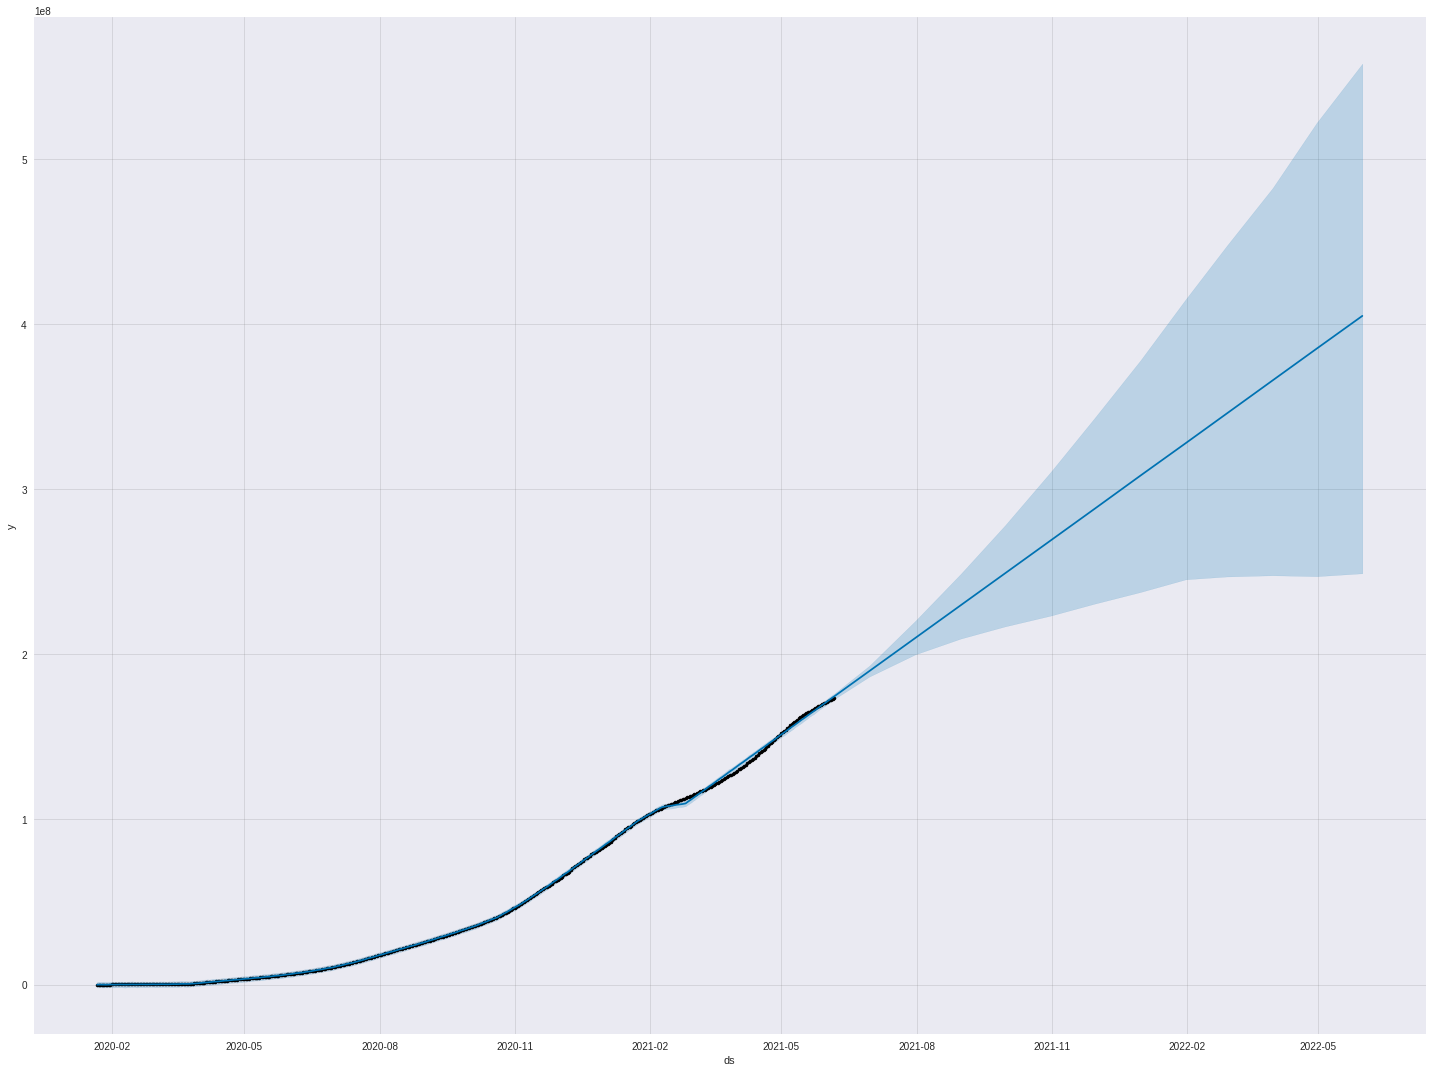

In [ ]:
confirmed_forecast_plot=n.plot(forecast, figsize=(20,15))

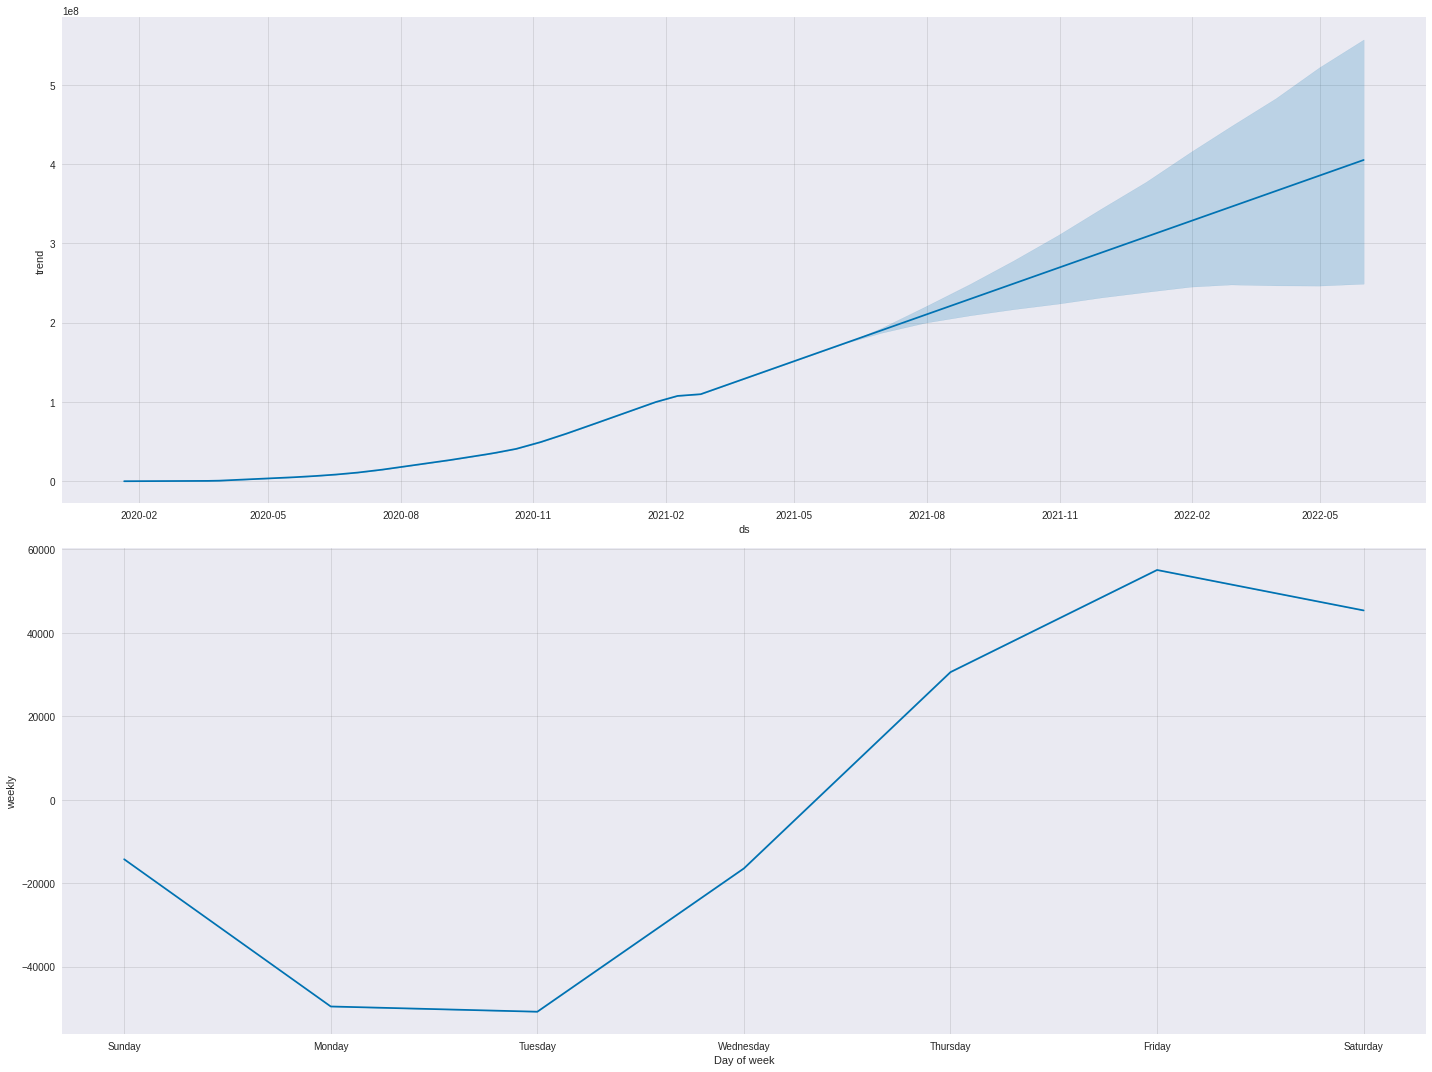

In [ ]:
confirmed_forecast_plot=n.plot_components(forecast, figsize=(20,15))

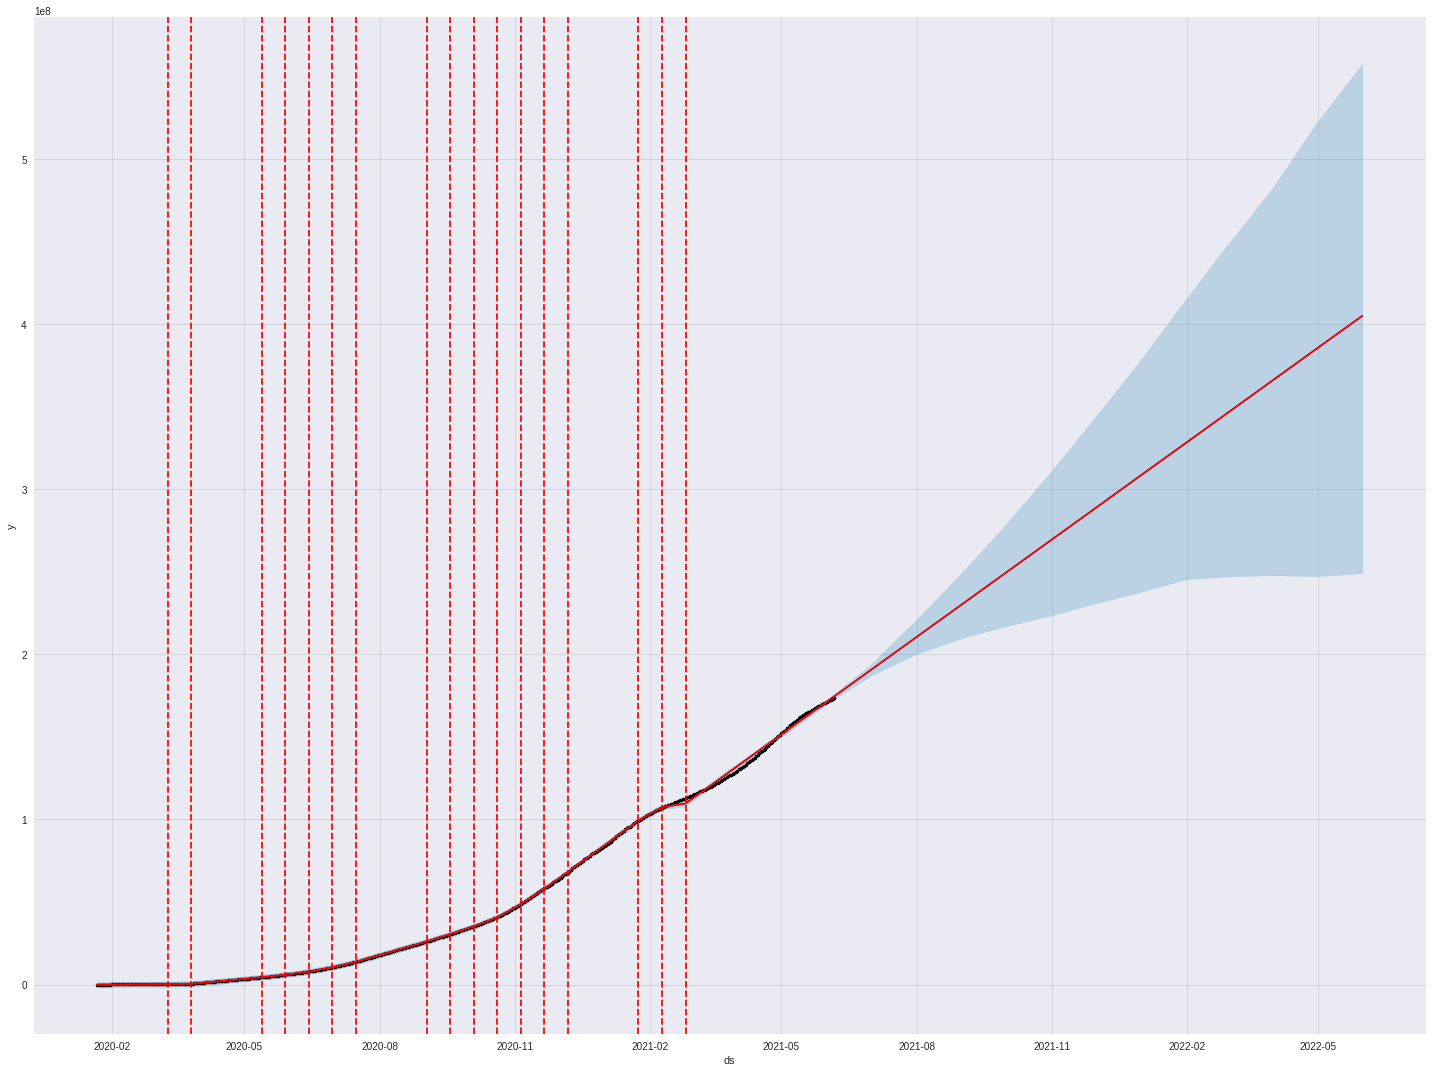

In [ ]:
fig=n.plot(forecast, figsize=(20,15))
a=add_changepoints_to_plot(fig.gca(),n,forecast)

In [ ]:
deaths_pr.columns=['ds','y']
deaths_pr['ds']=pd.to_datetime(deaths_pr['ds'])

In [ ]:
n=Prophet(interval_width=0.95)
n.fit(deaths_pr)
future=n.make_future_dataframe(periods=10, freq='D')
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
507,2021-06-12
508,2021-06-13
509,2021-06-14
510,2021-06-15
511,2021-06-16


In [ ]:
 #predicting the future with date, upper and lower limit of y value

 forecast=n.predict(future)
 forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
507,2021-06-12,3.689954e+06,3.658052e+06,3.721390e+06
508,2021-06-13,3.699170e+06,3.668092e+06,3.732873e+06
509,2021-06-14,3.707726e+06,3.673098e+06,3.740458e+06
510,2021-06-15,3.720346e+06,3.686639e+06,3.754437e+06
511,2021-06-16,3.734750e+06,3.698690e+06,3.771198e+06


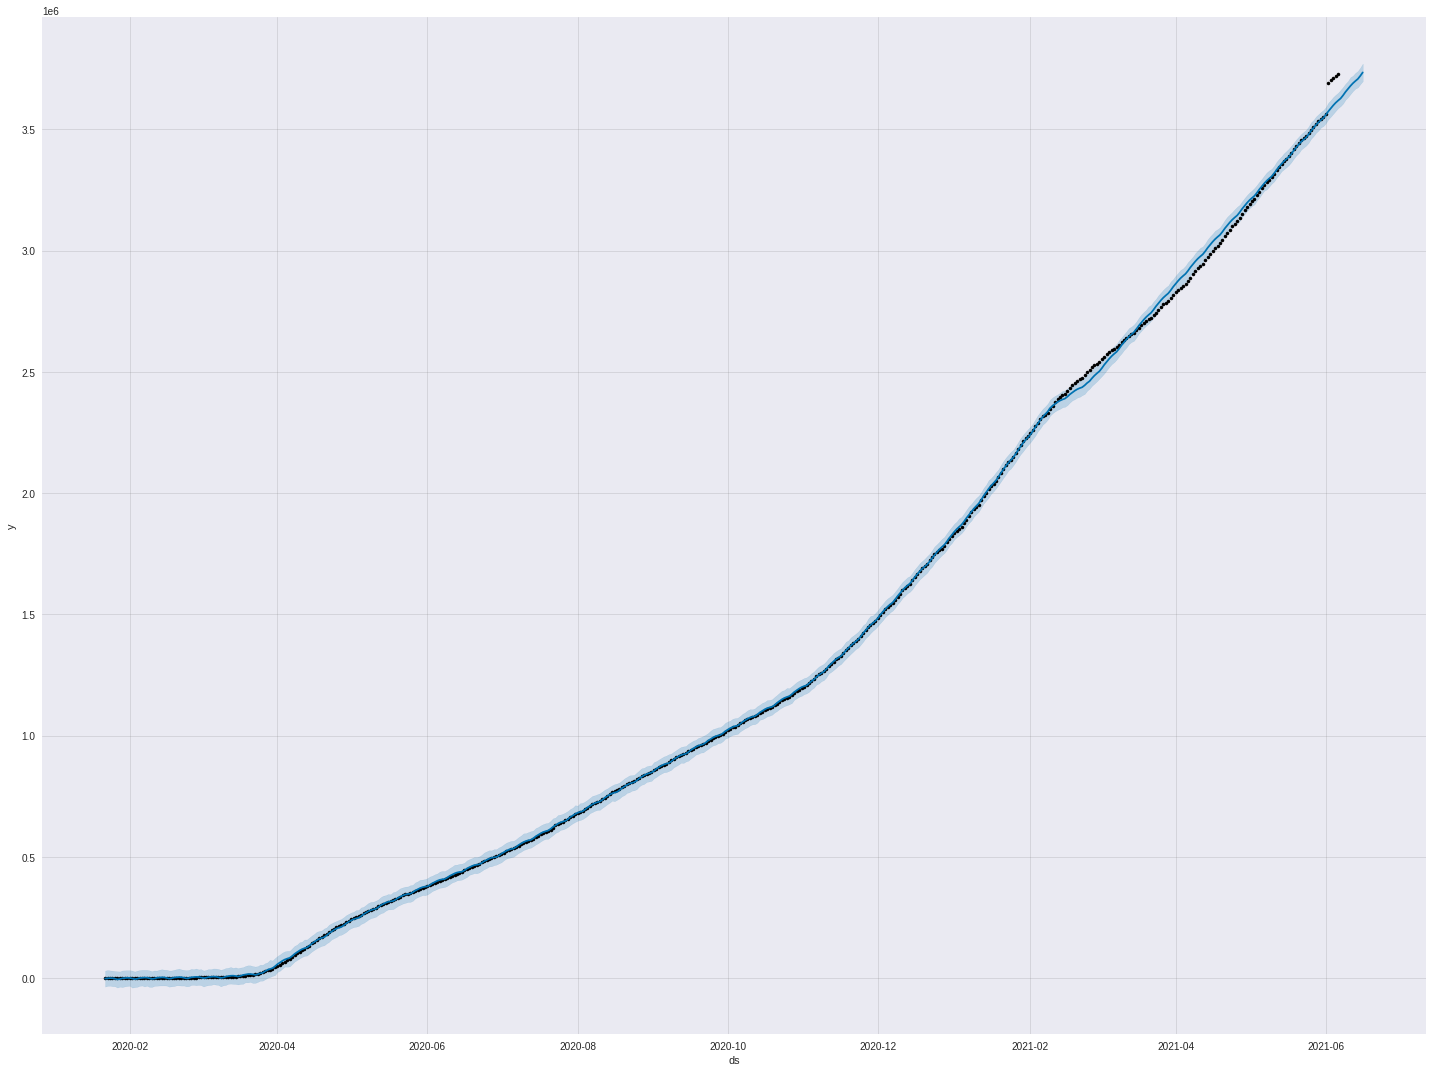

In [ ]:
deaths_forecast_plot=n.plot(forecast, figsize=(20,15))

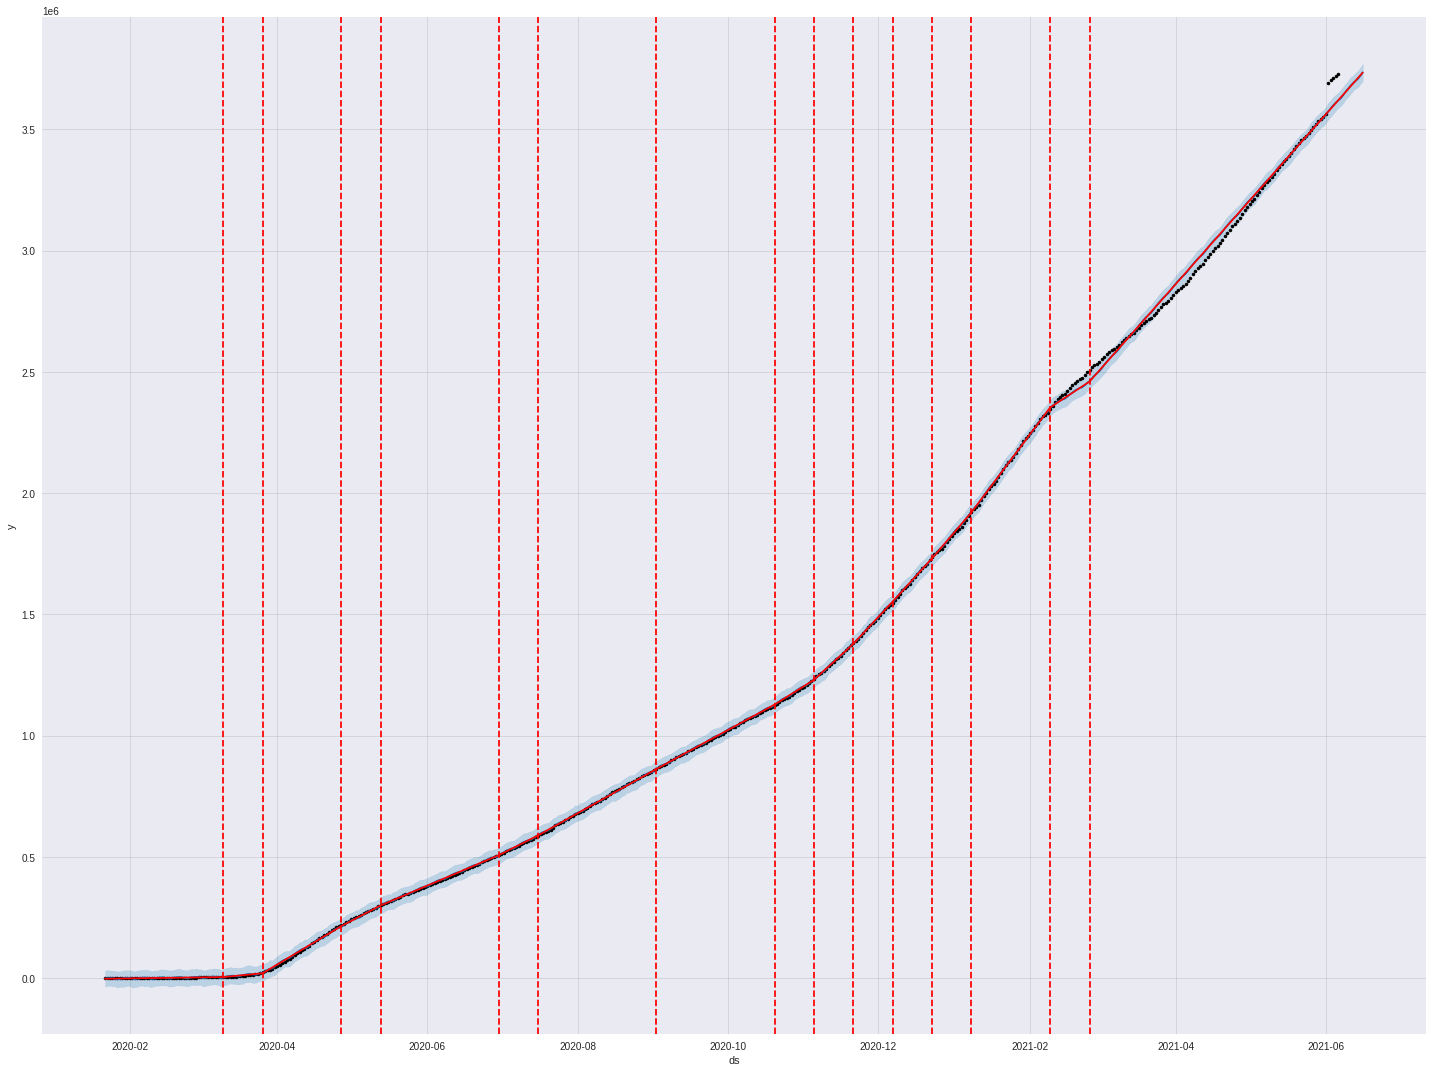

In [ ]:
fig=n.plot(forecast, figsize=(20,15))
a=add_changepoints_to_plot(fig.gca(),n,forecast)

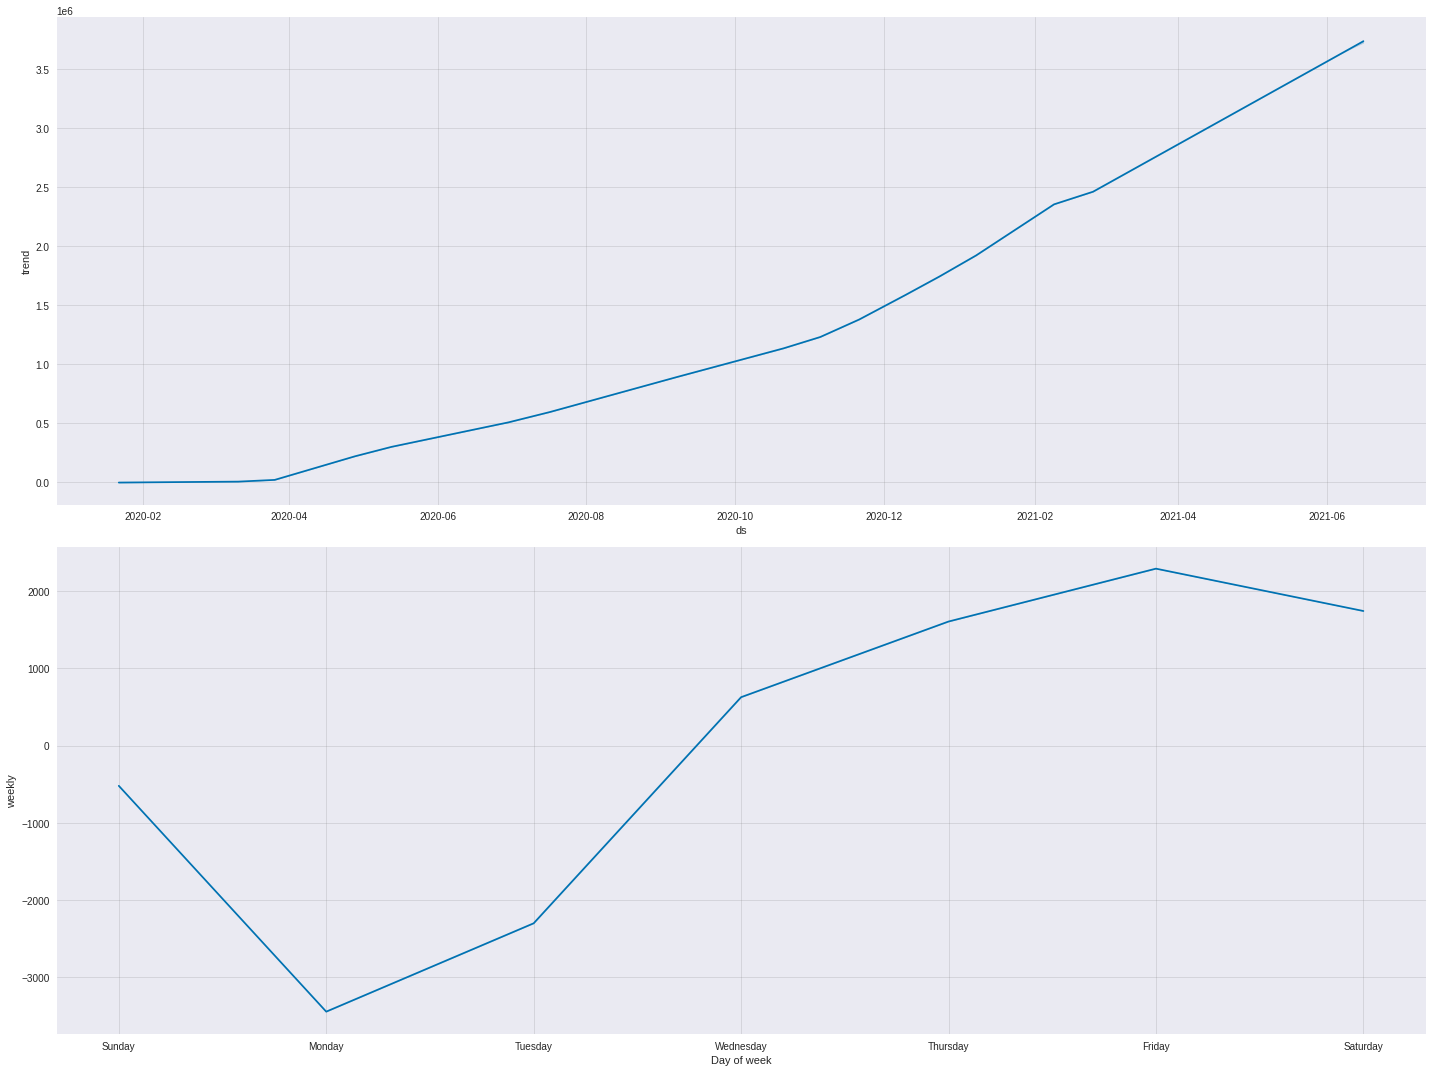

In [ ]:
deaths_forecast_plot=n.plot_components(forecast, figsize=(20,15))

In [ ]:
recovered_pr.columns=['ds','y']
recovered_pr['ds']=pd.to_datetime(recovered_pr['ds'])

In [ ]:
n=Prophet(interval_width=0.95)
n.fit(recovered_pr)
future=n.make_future_dataframe(periods=10, freq='D')
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
507,2021-06-12
508,2021-06-13
509,2021-06-14
510,2021-06-15
511,2021-06-16


In [ ]:
 #predicting the future with date, upper and lower limit of y value

 forecast=n.predict(future)
 forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
507,2021-06-12,1.101173e+08,1.073333e+08,1.129197e+08
508,2021-06-13,1.105748e+08,1.079377e+08,1.132945e+08
509,2021-06-14,1.109073e+08,1.082311e+08,1.136879e+08
510,2021-06-15,1.114054e+08,1.085519e+08,1.142568e+08
511,2021-06-16,1.118991e+08,1.089247e+08,1.147128e+08


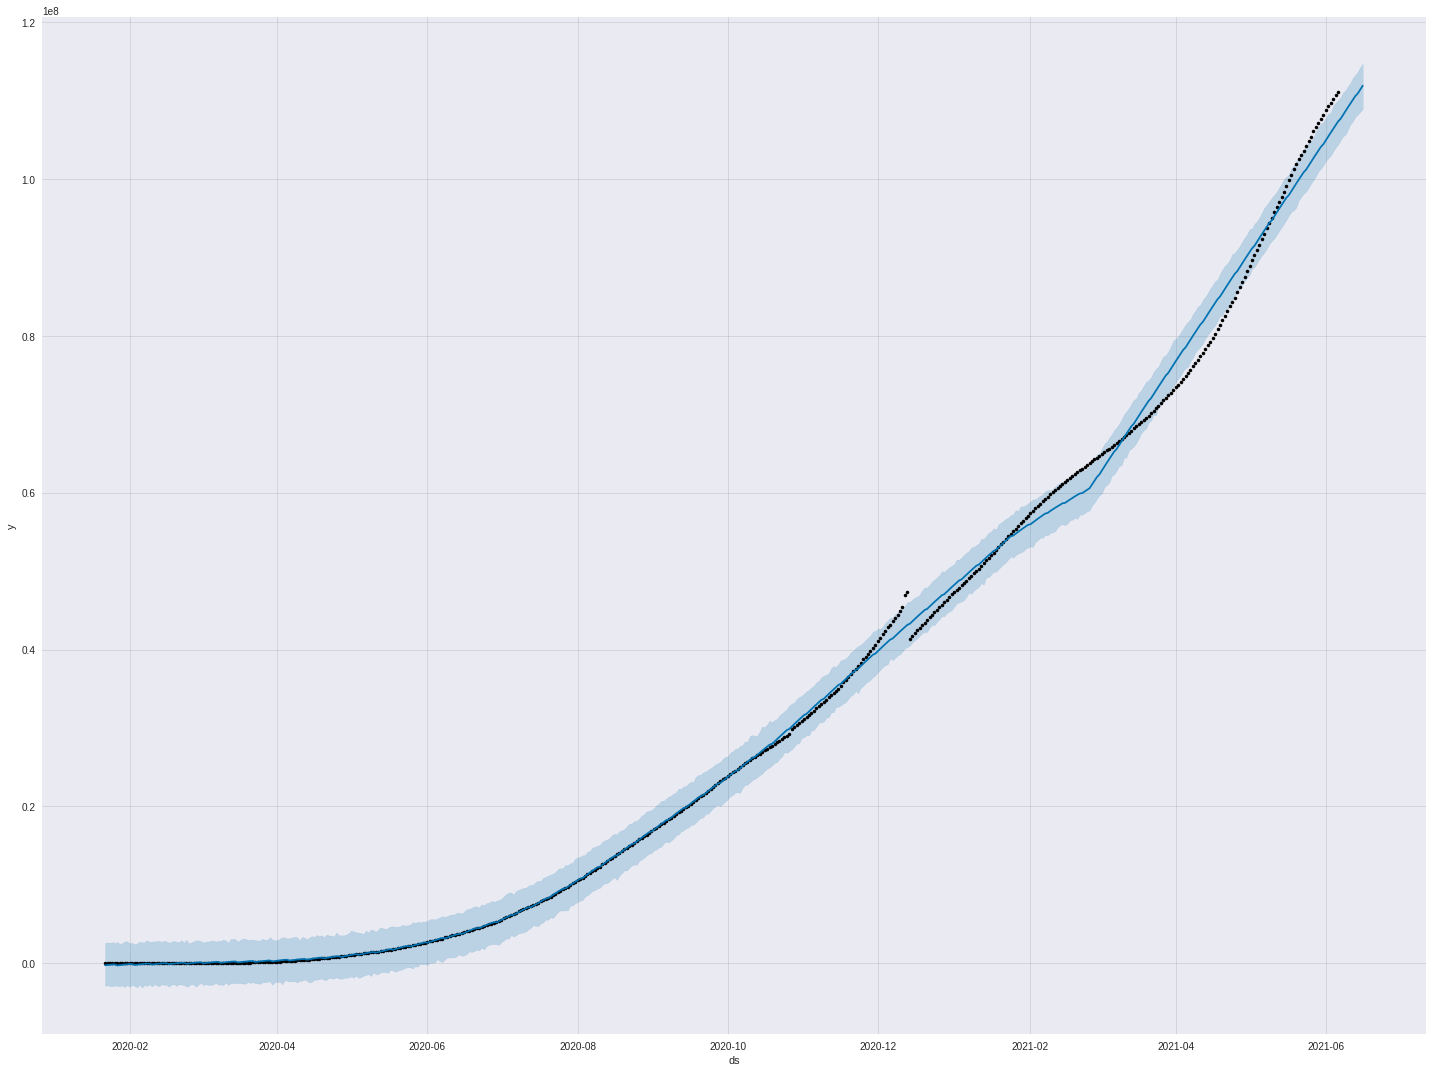

In [ ]:
recovered_forecast_plot=n.plot(forecast, figsize=(20,15))

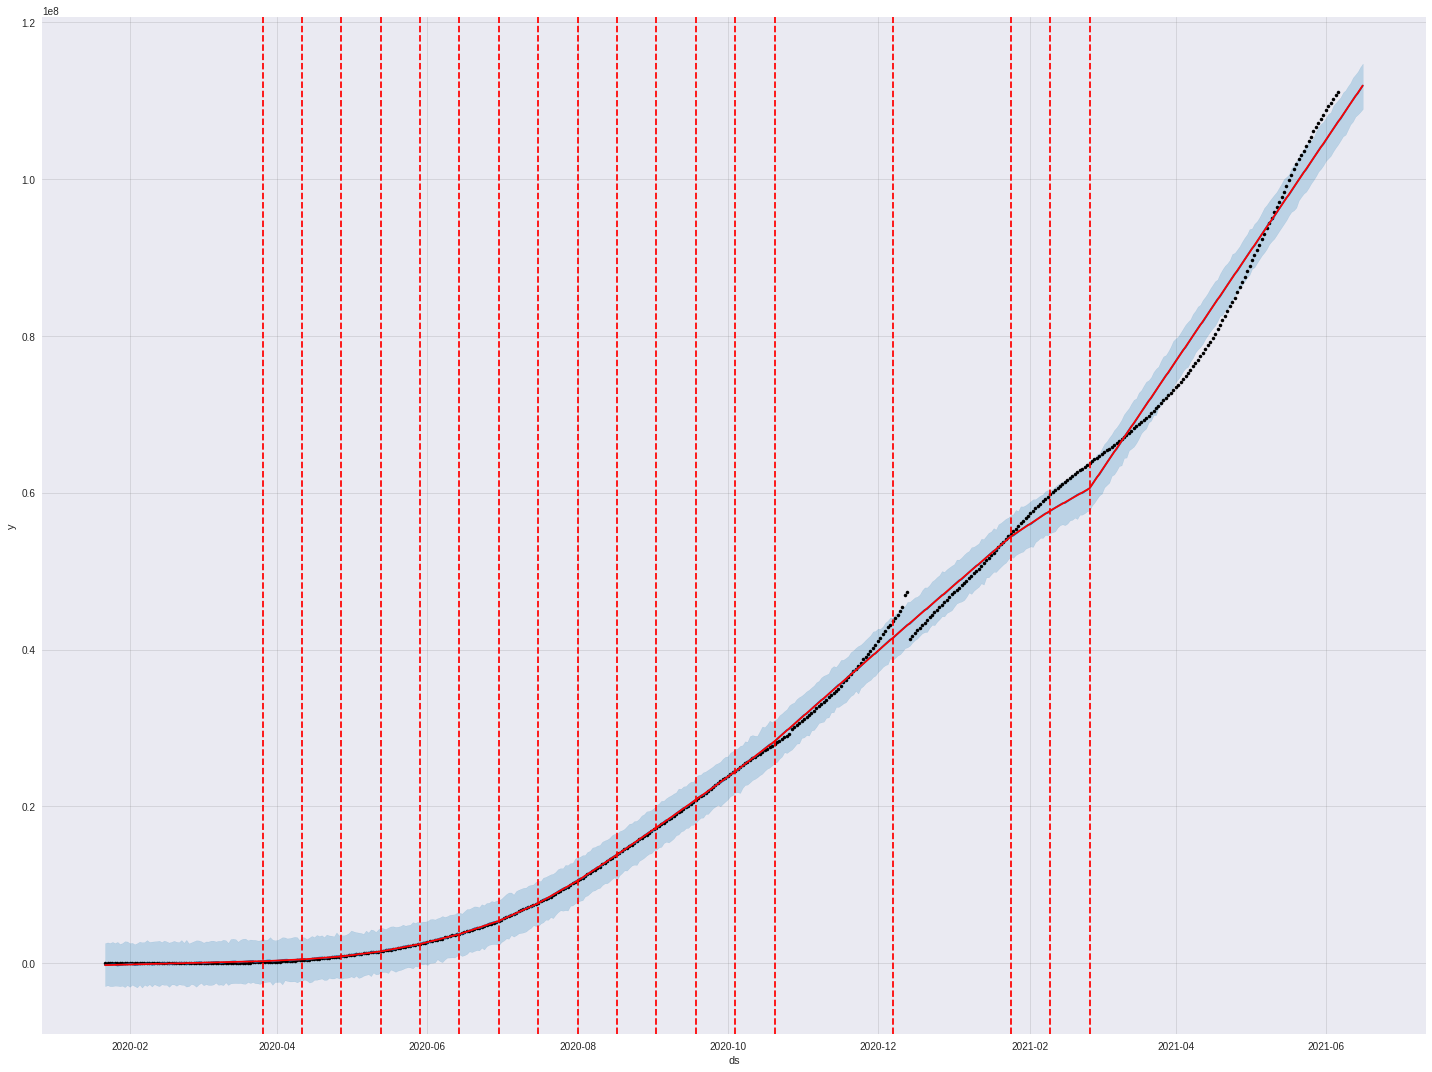

In [ ]:
fig=n.plot(forecast, figsize=(20,15))
a=add_changepoints_to_plot(fig.gca(),n,forecast)

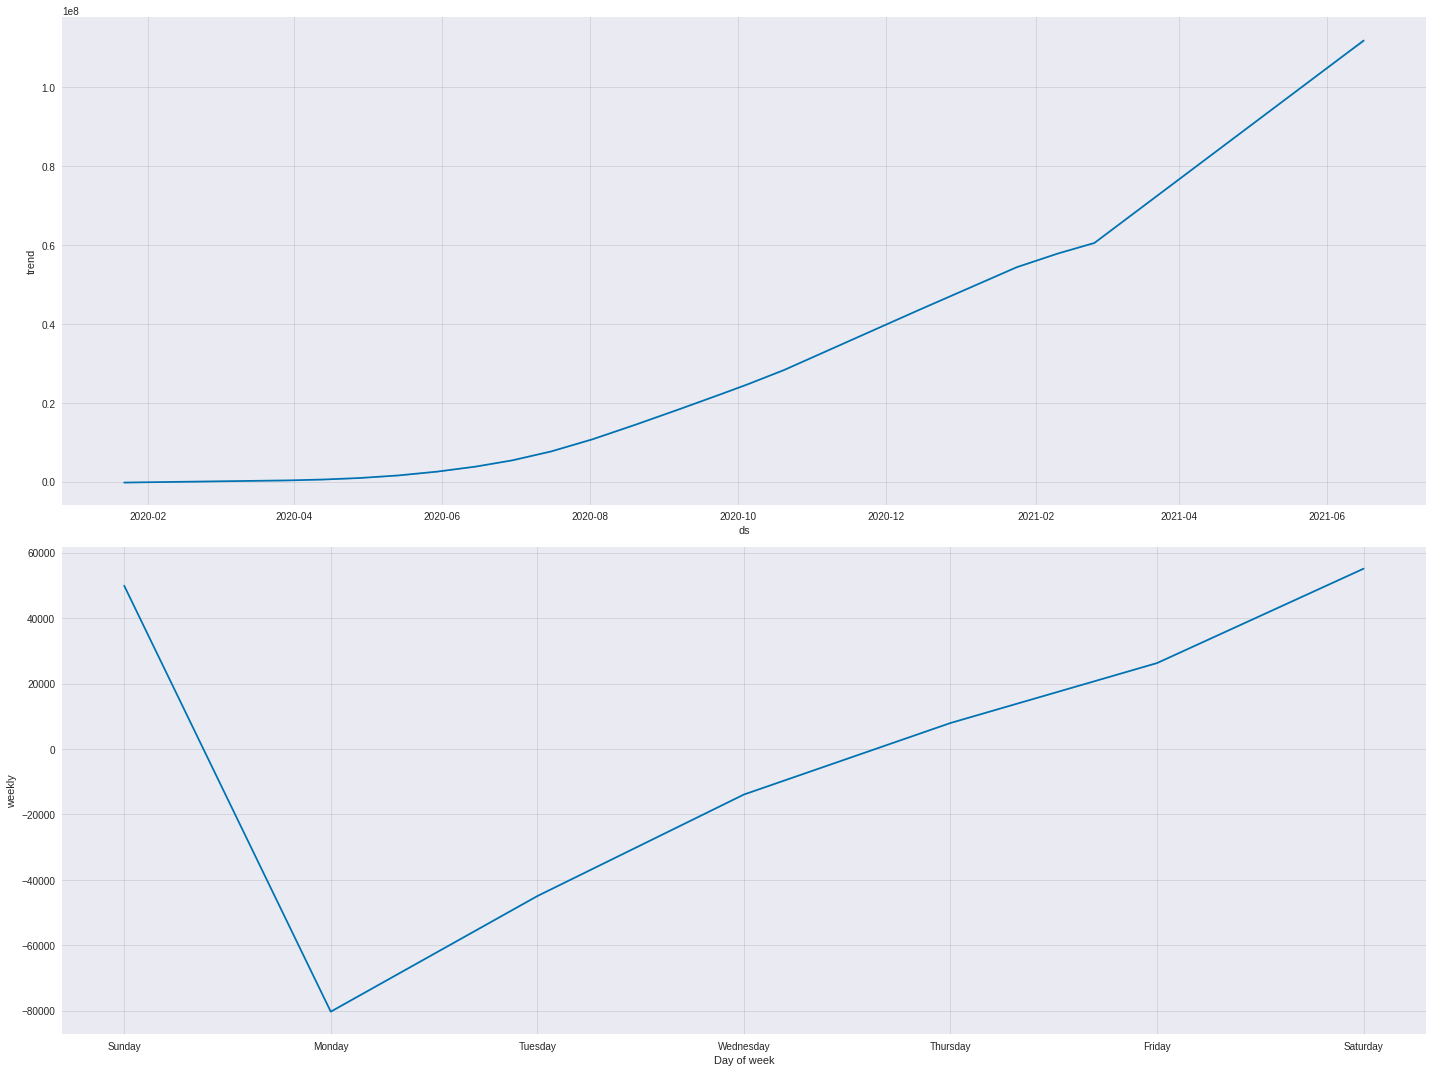

In [ ]:
recovered_forecast_plot=n.plot_components(forecast, figsize=(20,15))